# Output Presentation

The objective of this notebook is to present in an interpretabel way the output of the best performing mode.


In [122]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [ ]:
df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['SenseToKnowStudy'],
                           #'order': 'first', 
                             'completed': True}, 
                            verbose=False)

display(data.df.groupby(data.outcome_column)[['id']].count())

,id
diagnosis,
-1.0,166
0.0,1487
1.0,97
2.0,37


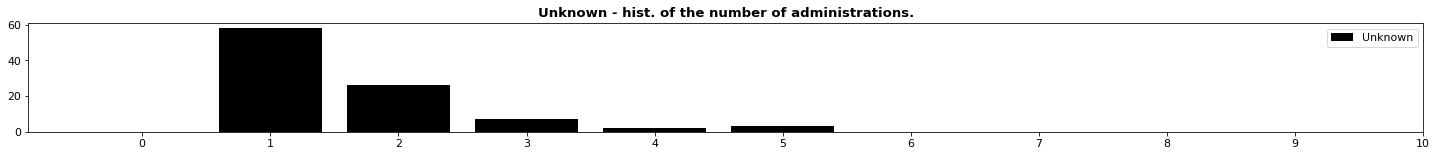

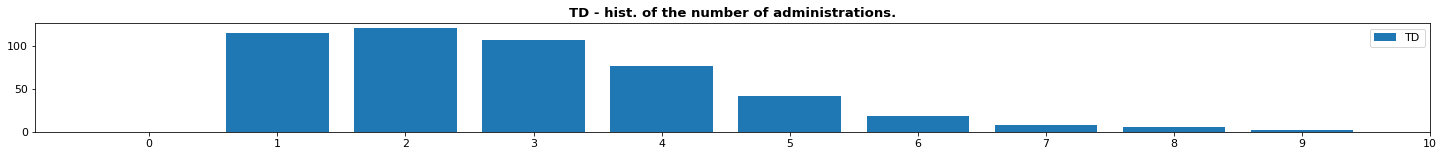

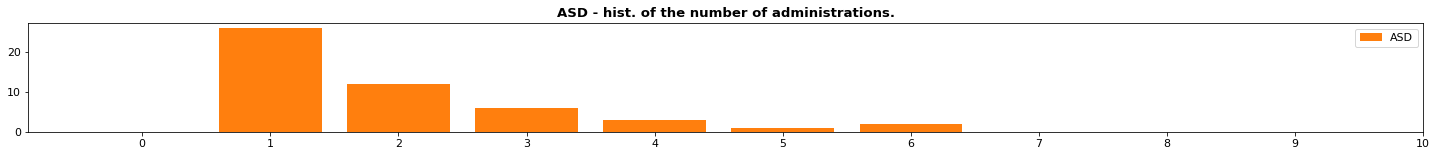

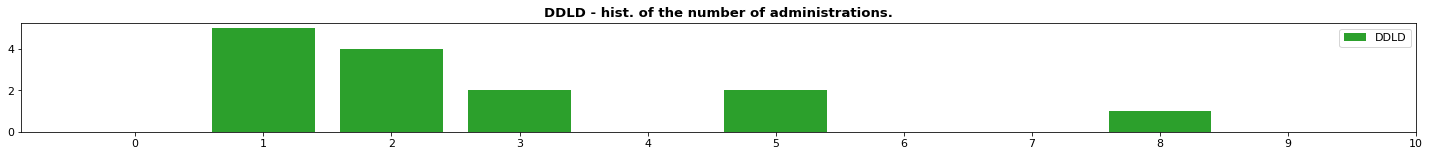

In [158]:
df=data.df
DIAG_DICT = {'Unknown':-1,
             'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'Unknown': 'k',
          'comorbid':'#9467bd'}


for i, d in data.df.groupby('diagnosis'):
    plt.figure(figsize=(25, 2)), 
    plt.hist(d.groupby("id")['diagnosis'].count().to_numpy(), bins = np.linspace(0, 10 , 11), rwidth=.8,color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    plt.xticks(ticks=np.linspace(0, 10 , 11)+.5, labels=np.linspace(0, 10 , 11).astype(int));plt.legend()
    plt.title("{} - hist. of the number of administrations.".format(DIAG_DICT_REVERSE[i]), weight='bold')
           

# Experiemnt: predicting whether the app is done remote or not based on our features - All complete administrations 

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.872,0.757,0.821,0.244,0.983,0.724,0.232,0.82,0.588,0.726,0.865,0.715,0.871,0.274,0.285,0.129


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model.       This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset.       The color allows us match how changes in the value of a feature effect the change in risk.


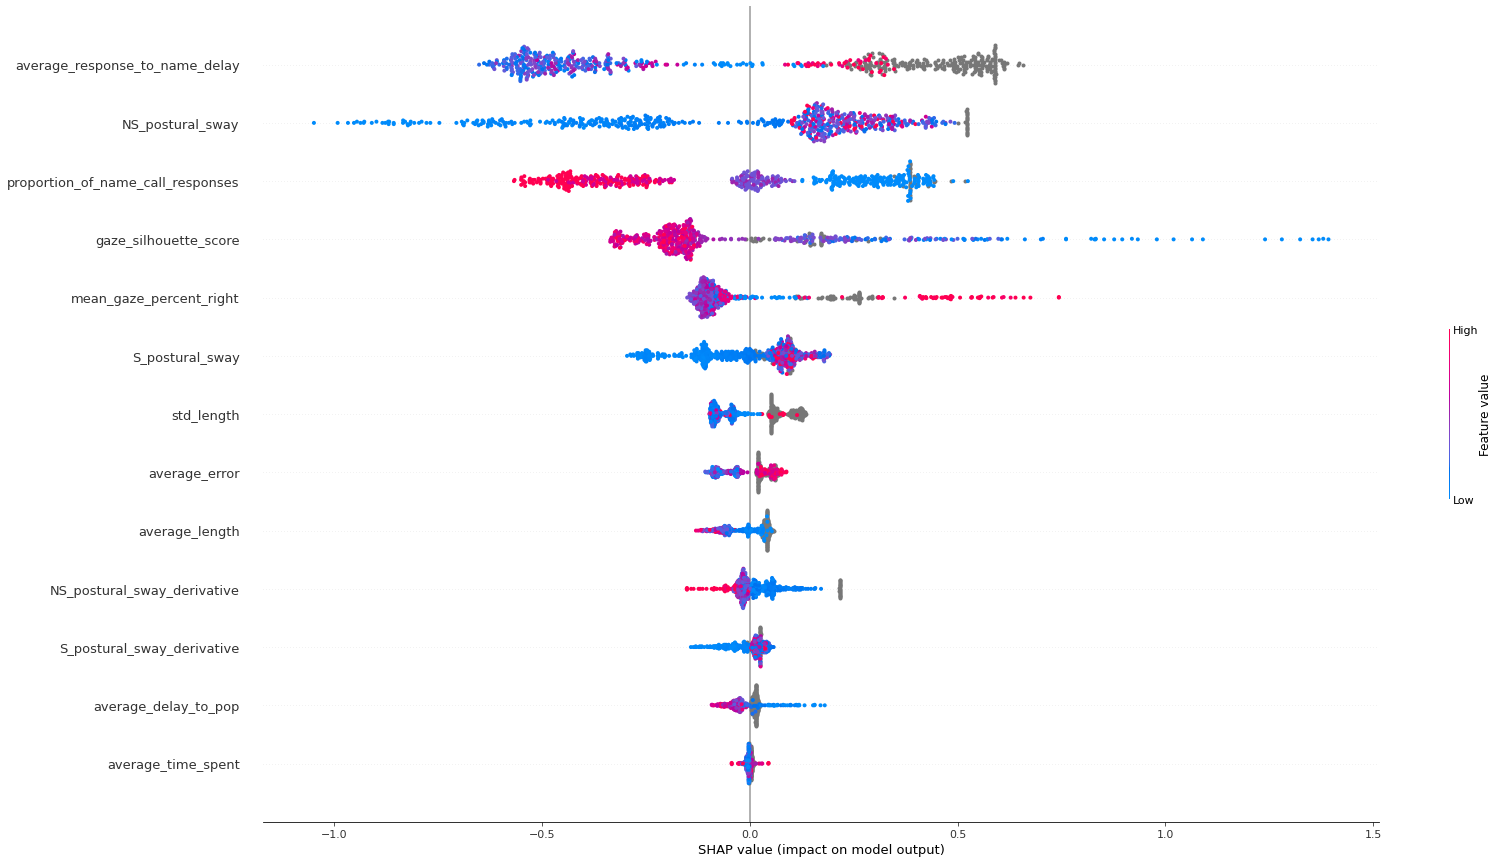

In [129]:
DEFAULT_PREDICTORS = [# GAZE RELATED
                   # 'diagnosis',
                     'mean_gaze_percent_right', #aggregated
                     'gaze_silhouette_score', #aggregated

                    # NAME CALL RELATED
                     'proportion_of_name_call_responses',
                     'average_response_to_name_delay',
                   #   'name_call_response_binary',


                    # POSTURAL SWAY RELATED
                     'S_postural_sway',  #aggregated
                     'NS_postural_sway',  #aggregated
                     'S_postural_sway_derivative',
                     'NS_postural_sway_derivative',

                    # TOUCH RELATED
                     'average_length',
                     'std_length',
                     'average_error',
                     #'pop_rate',
                     'average_delay_to_pop',
                     'average_time_spent']

df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3', 'P1R', 'P3R', 'IMPACT', 'SenseToKnowStudy'],
                          # 'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0]},
                            verbose=True)


X, y = data.df[DEFAULT_PREDICTORS], data.y_train


df =  pd.read_csv(AUTISM_DATA_PATH)
data_not_scaled = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data_not_scaled.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3', 'P1R', 'P3R', 'IMPACT', 'SenseToKnowStudy'],
                        #                'order': 'first', 
                                        'completed': True}, 
                           demographics={'age':[17, 45]}, 
                          clinical={'diagnosis': [0]},
                            verbose=False)


X, y = data_not_scaled.df[DEFAULT_PREDICTORS], data.y_train
X_display, y_display = data_not_scaled.df[DEFAULT_PREDICTORS], data_not_scaled.y_train



exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)


exp.fit_predict(num_cv=5)
display(exp.performances_df)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)

exp.fit()

print("The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model. \
      This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. \
      The color allows us match how changes in the value of a feature effect the change in risk.")

import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(exp.dataset.X_train, approximate=False)

## SHAP Summary Plo
shap.summary_plot(shap_values, exp.dataset.X_train, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))

**WIthout the RTN features**

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.824,0.707,0.737,0.252,0.983,0.661,0.313,0.73,0.472,0.817,0.689,0.551,0.89,0.183,0.449,0.11


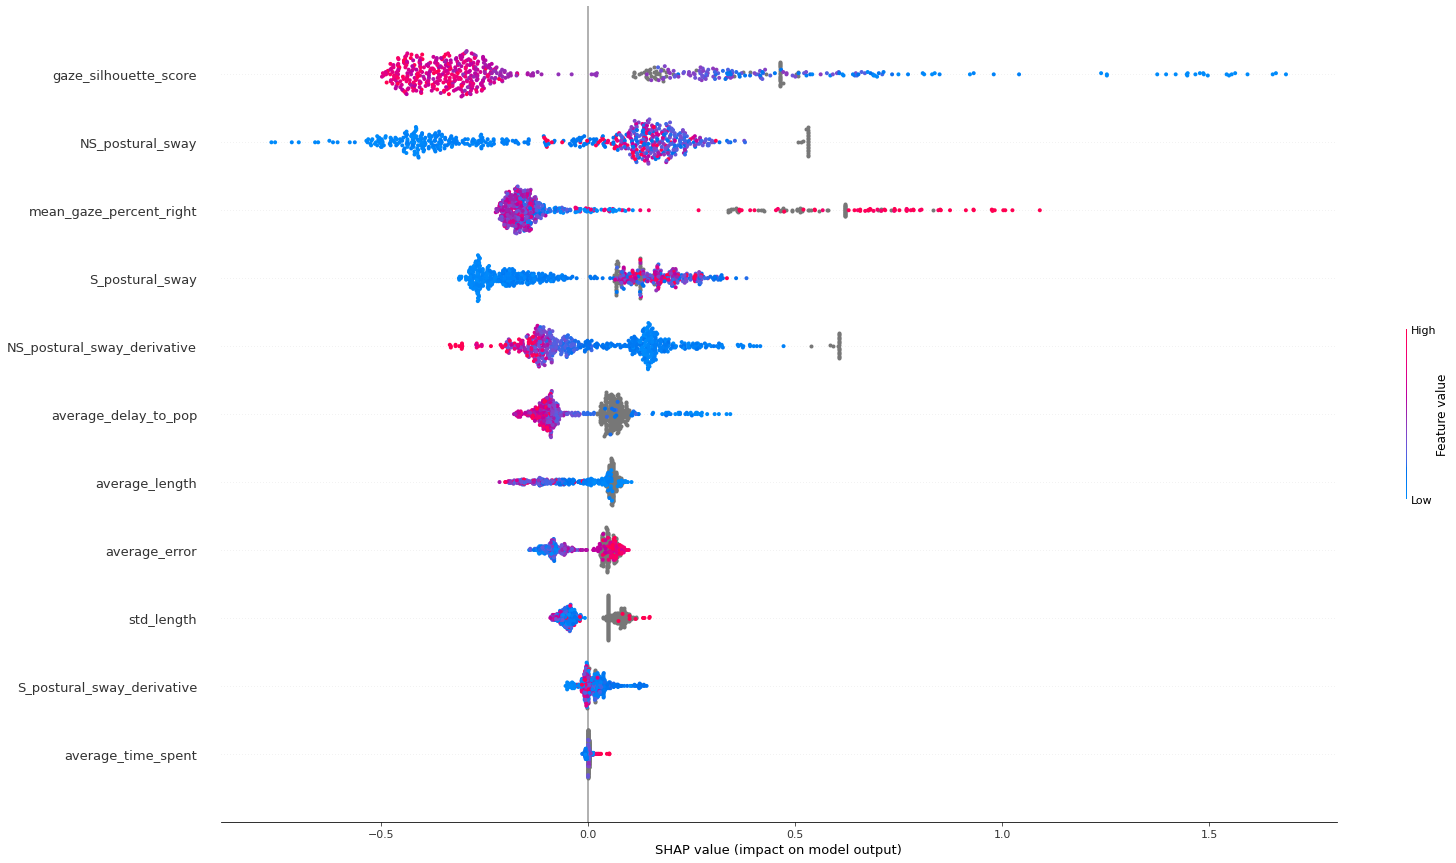

In [126]:
DEFAULT_PREDICTORS = [# GAZE RELATED
                   # 'diagnosis',
                     'mean_gaze_percent_right', #aggregated
                     'gaze_silhouette_score', #aggregated

                    # NAME CALL RELATED
                    # 'proportion_of_name_call_responses',
                    # 'average_response_to_name_delay',
                    #  'name_call_response_binary',


                    # POSTURAL SWAY RELATED
                     'S_postural_sway',  #aggregated
                     'NS_postural_sway',  #aggregated
                     'S_postural_sway_derivative',
                     'NS_postural_sway_derivative',

                    # TOUCH RELATED
                     'average_length',
                     'std_length',
                     'average_error',
                     #'pop_rate',
                     'average_delay_to_pop',
                     'average_time_spent']

df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3', 'P1R', 'P3R', 'IMPACT', 'SenseToKnowStudy'],
                          # 'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0]},
                            verbose=True)


X, y = data.df[DEFAULT_PREDICTORS], data.y_train


df =  pd.read_csv(AUTISM_DATA_PATH)
data_not_scaled = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data_not_scaled.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3', 'P1R', 'P3R', 'IMPACT', 'SenseToKnowStudy'],
                        #                'order': 'first', 
                                        'completed': True}, 
                           demographics={'age':[17, 45]}, 
                          clinical={'diagnosis': [0]},
                            verbose=False)


X, y = data_not_scaled.df[DEFAULT_PREDICTORS], data.y_train
X_display, y_display = data_not_scaled.df[DEFAULT_PREDICTORS], data_not_scaled.y_train



exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)


exp.fit_predict(num_cv=5)
display(exp.performances_df)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)

exp.fit()

## Explain the model's predictions on the entire dataset¶


import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(exp.dataset.X_train, approximate=False)

## SHAP Summary Plo
shap.summary_plot(shap_values, exp.dataset.X_train, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))

# Experiemnt: predicting whether the app is done remote or not based on our features - Only 17-45 mo neurotypical

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.832,0.417,0.798,0.125,0.928,0.491,0.172,0.823,0.4,0.639,0.85,0.386,0.941,0.361,0.614,0.059


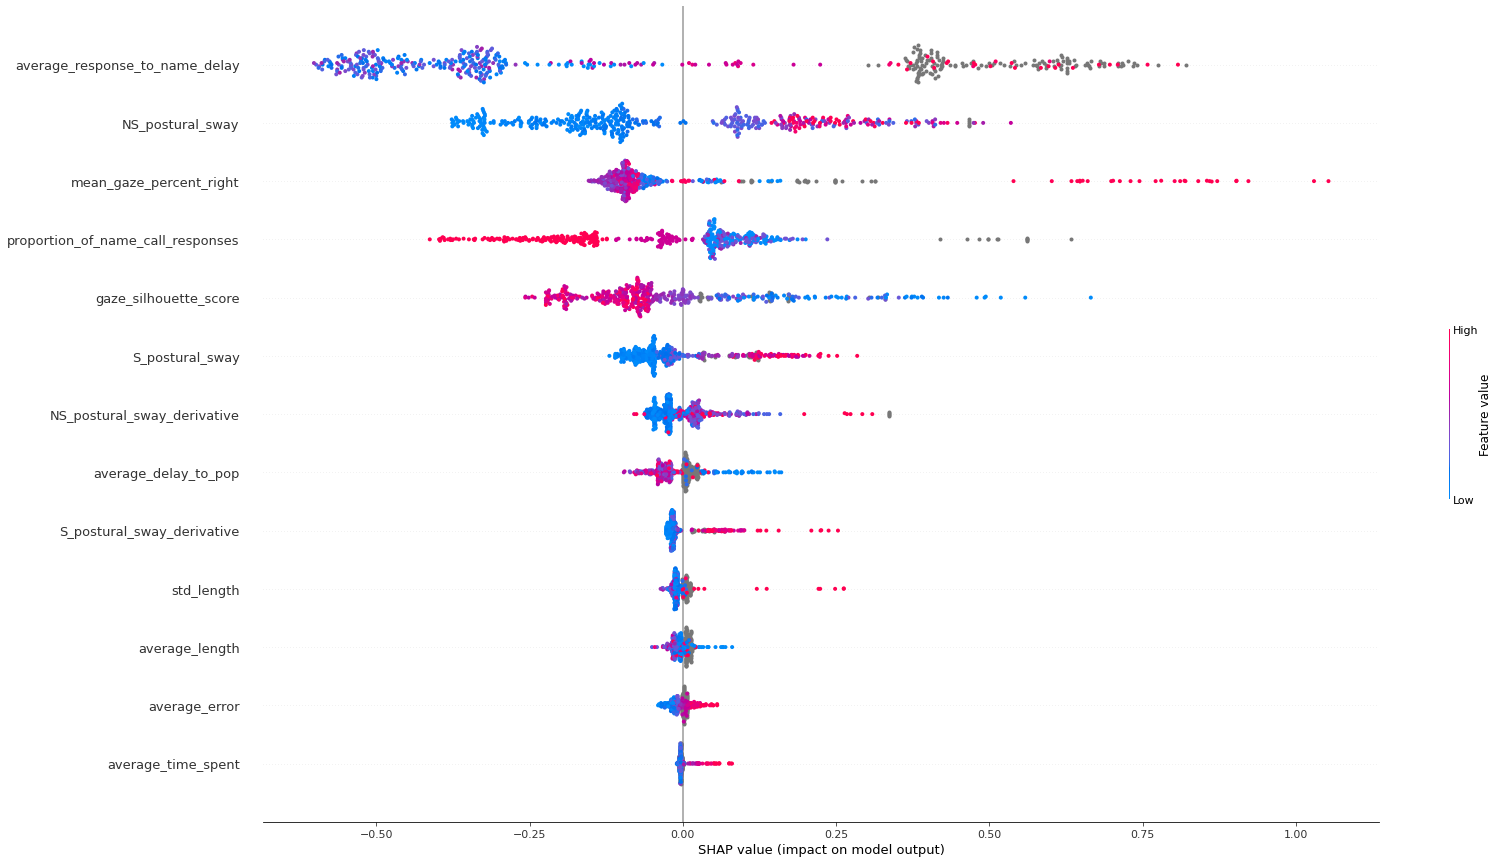

In [159]:
DEFAULT_PREDICTORS = [# GAZE RELATED
                   # 'diagnosis',
                     'mean_gaze_percent_right', #aggregated
                     'gaze_silhouette_score', #aggregated

                    # NAME CALL RELATED
                     'proportion_of_name_call_responses',
                     'average_response_to_name_delay',
                    #  'name_call_response_binary',

                    # POSTURAL SWAY RELATED
                     'S_postural_sway',  #aggregated
                     'NS_postural_sway',  #aggregated
                     'S_postural_sway_derivative',
                     'NS_postural_sway_derivative',

                    # TOUCH RELATED
                     'average_length',
                     'std_length',
                     'average_error',
                     #'pop_rate',
                     'average_delay_to_pop',
                     'average_time_spent']


df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['ARC', 'P1', 'SenseToKnowStudy'],
                           'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0]},
                            verbose=False)


X, y = data.df[DEFAULT_PREDICTORS], data.y_train


df =  pd.read_csv(AUTISM_DATA_PATH)
data_not_scaled = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data_not_scaled.filter(administration={'studies': ['ARC', 'P1', 'SenseToKnowStudy'],
                           'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0, 1]},
                            verbose=True)


X, y = data_not_scaled.df[DEFAULT_PREDICTORS], data.y_train
X_display, y_display = data_not_scaled.df[DEFAULT_PREDICTORS], data_not_scaled.y_train



exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)


exp.fit_predict(num_cv=5)
display(exp.performances_df)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)

exp.fit()

## Explain the model's predictions on the entire dataset¶


import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(exp.dataset.X_train, approximate=False)

## SHAP Summary Plo
shap.summary_plot(shap_values, exp.dataset.X_train, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.766,0.38,0.752,0.19,0.96,0.39,0.235,0.747,0.282,0.617,0.766,0.276,0.932,0.383,0.724,0.068


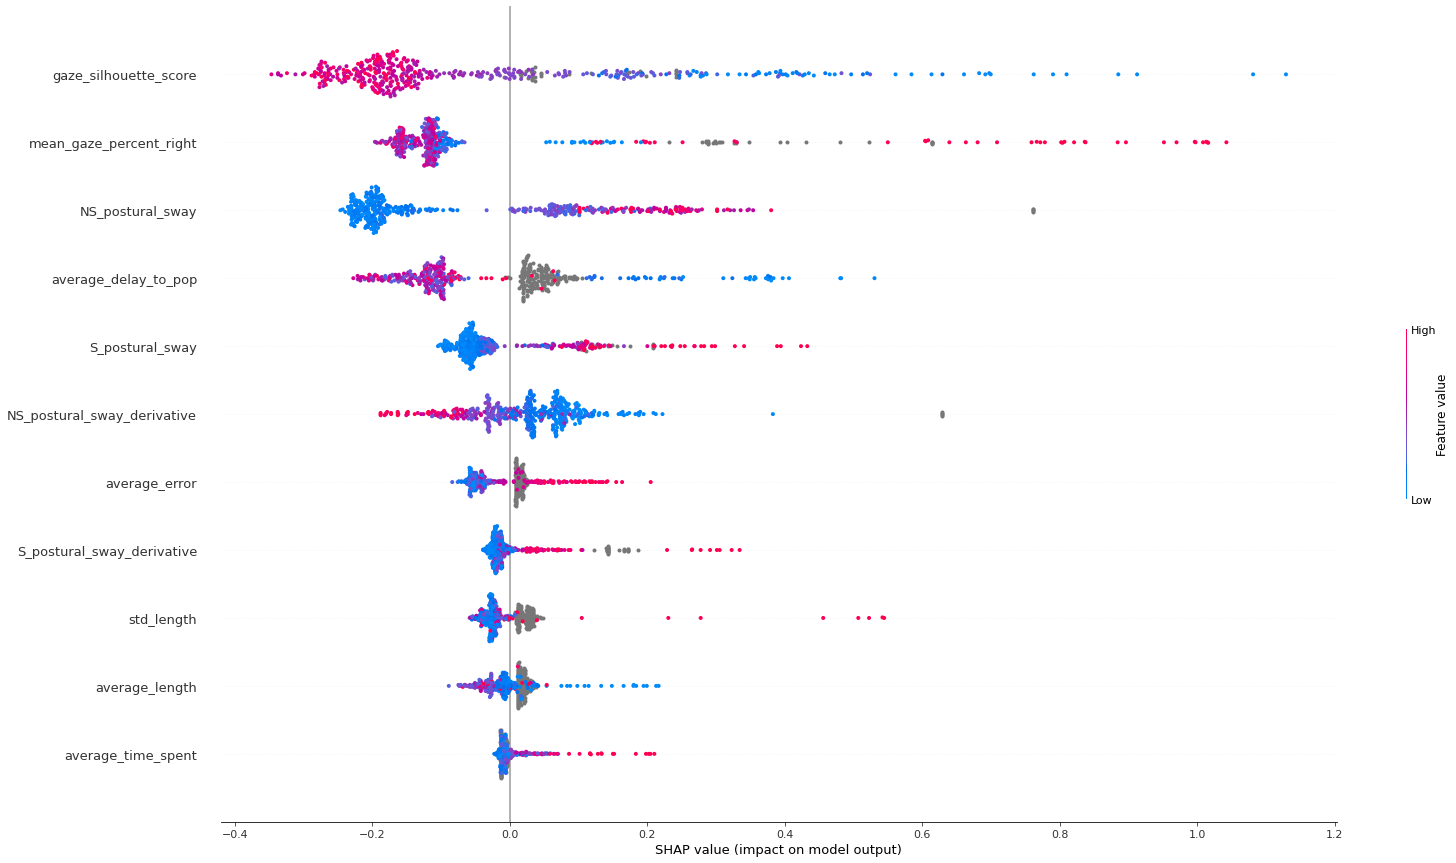

In [133]:
DEFAULT_PREDICTORS = [# GAZE RELATED
                   # 'diagnosis',
                     'mean_gaze_percent_right', #aggregated
                     'gaze_silhouette_score', #aggregated

                    # NAME CALL RELATED
                    # 'proportion_of_name_call_responses',
                    # 'average_response_to_name_delay',
                    #  'name_call_response_binary',


                    # POSTURAL SWAY RELATED
                     'S_postural_sway',  #aggregated
                     'NS_postural_sway',  #aggregated
                     'S_postural_sway_derivative',
                     'NS_postural_sway_derivative',

                    # TOUCH RELATED
                     'average_length',
                     'std_length',
                     'average_error',
                     #'pop_rate',
                     'average_delay_to_pop',
                     'average_time_spent']

df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=True,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['ARC', 'P1', 'SenseToKnowStudy'],
                           'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0]},
                            verbose=False)


X, y = data.df[DEFAULT_PREDICTORS], data.y_train


df =  pd.read_csv(AUTISM_DATA_PATH)
data_not_scaled = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='remote',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data_not_scaled.filter(administration={'studies': ['ARC', 'P1', 'SenseToKnowStudy'],
                           'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 
                           clinical={'diagnosis': [0, 1]},
                            verbose=True)


X, y = data_not_scaled.df[DEFAULT_PREDICTORS], data.y_train
X_display, y_display = data_not_scaled.df[DEFAULT_PREDICTORS], data_not_scaled.y_train



exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)


exp.fit_predict(num_cv=5)
display(exp.performances_df)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  verbosity=0, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)

exp.fit()

## Explain the model's predictions on the entire dataset¶


import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(exp.dataset.X_train, approximate=False)

## SHAP Summary Plo
shap.summary_plot(shap_values, exp.dataset.X_train, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))


In [161]:
print("Results for XGBOOST")
display(exp.performances_df)
print("Results for EBM")
display(exp_ebm.performances_df)


Results for XGBOOST


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.855,0.38,0.859,0.167,0.955,0.458,0.223,0.888,0.386,0.512,0.924,0.389,0.952,0.488,0.611,0.048


Results for EBM


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.867,0.379,0.874,0.164,0.946,0.453,0.218,0.875,0.383,0.561,0.905,0.359,0.956,0.439,0.641,0.044


In [145]:
DEFAULT_PREDICTORS = [# GAZE RELATED
                 'mean_gaze_percent_right', #aggregated
                 'gaze_silhouette_score', #aggregated
    
                # NAME CALL RELATED
                 'proportion_of_name_call_responses',
                 'average_response_to_name_delay',
                 # 'name_call_response_binary',

    
                # POSTURAL SWAY RELATED
                 'S_postural_sway',  #aggregated
                 'NS_postural_sway',  #aggregated
                 'S_postural_sway_derivative',
                 'NS_postural_sway_derivative',
                
                # TOUCH RELATED
                 'average_length',
                 'std_length',
                 'average_error',
                 #'pop_rate',
                 'average_delay_to_pop',
                 'average_time_spent']

df =  pd.read_csv(AUTISM_DATA_PATH)
data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None,#'papers',
               proportion_train=1)

data.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3'],
                           'order': 'first', 
                             'completed': True}, 
                           demographics={'age':[17, 45]}, 

                            clinical={'diagnosis': [0, 1]},
                            verbose=False)

display(data.df.groupby(data.outcome_column)[['id']].count())

X, y = data.df[DEFAULT_PREDICTORS], data.y_train

df =  pd.read_csv(AUTISM_DATA_PATH)
data_not_scaled = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False,
               verbosity=0,
               scenario=None, #'papers',
               proportion_train=1)

data_not_scaled.filter(administration={'studies': ['ARC', 'P1', 'P2', 'P3'],
                           # 'order': 'first', 
                             'completed': True}, 
                         demographics={'age':[17, 45]}, 
                       clinical={'diagnosis': [0, 1]},
                            verbose=True)

X_display, y_display = data_not_scaled.df[DEFAULT_PREDICTORS], data_not_scaled.y_train

,id
diagnosis,
0.0,417
1.0,45


In [146]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=True, 
                  verbosity=4, 
                  
                  experiment_folder_name='paper_experiment_1_fs',
                  save_experiment=False)

In [147]:
exp.fit()

## Explain the model's predictions on the entire dataset¶


In [148]:
import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(X, approximate=False)

## SHAP Summary Plot¶


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model. 

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk.

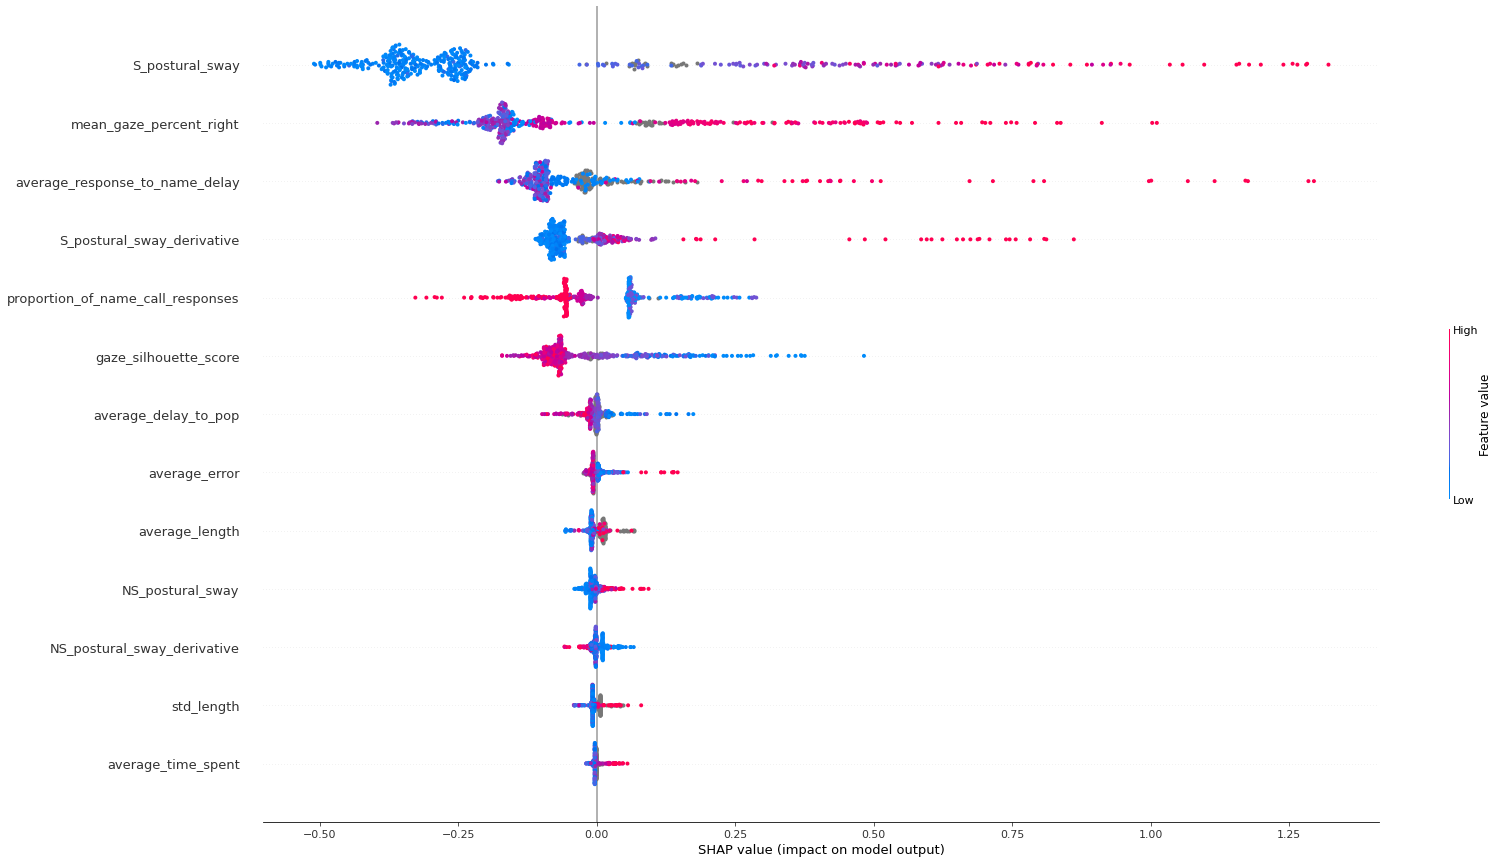

In [149]:
shap.summary_plot(shap_values, X, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))

## SHAP Dependence Plots


While a SHAP summary plot gives a general overview of each feature a SHAP dependence plot show how the model output varies by feauture value. Note that every dot is a participant, and the vertical dispersion at a single feature value results from interaction effects in the model. The feature used for coloring is automatically chosen to highlight what might be driving these interactions. Later we will see how to check that the interaction is really in the model with SHAP interaction values. Note that the row of a SHAP summary plot results from projecting the points of a SHAP dependence plot onto the y-axis, then recoloring by the feature itself.


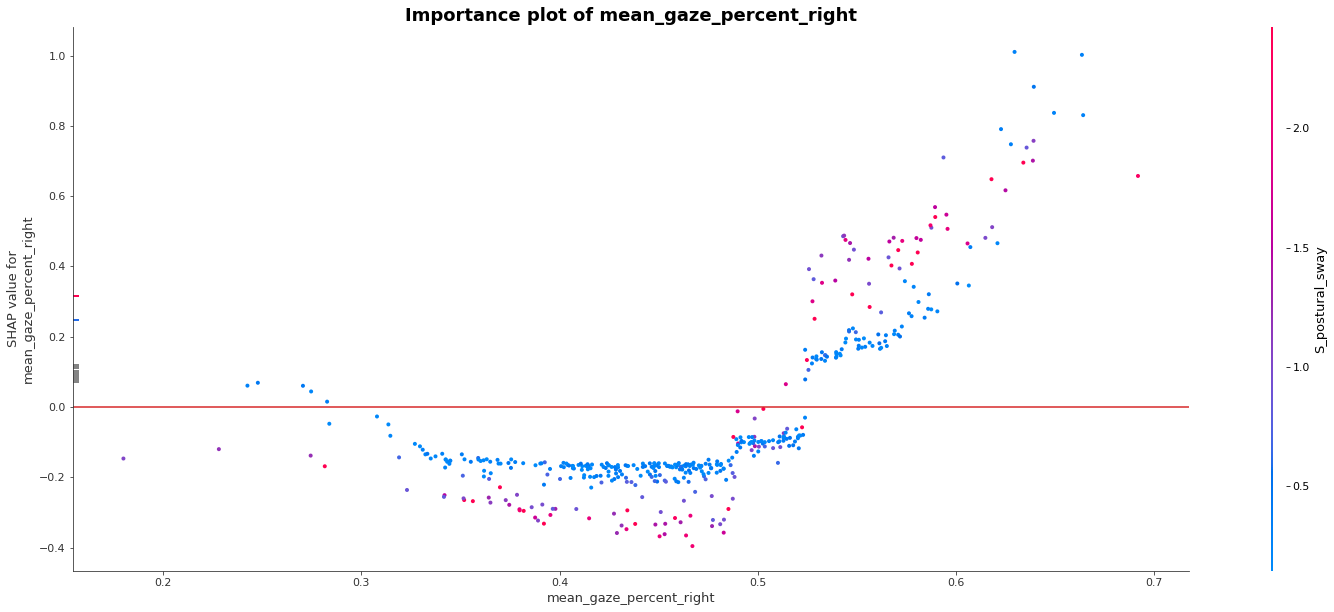

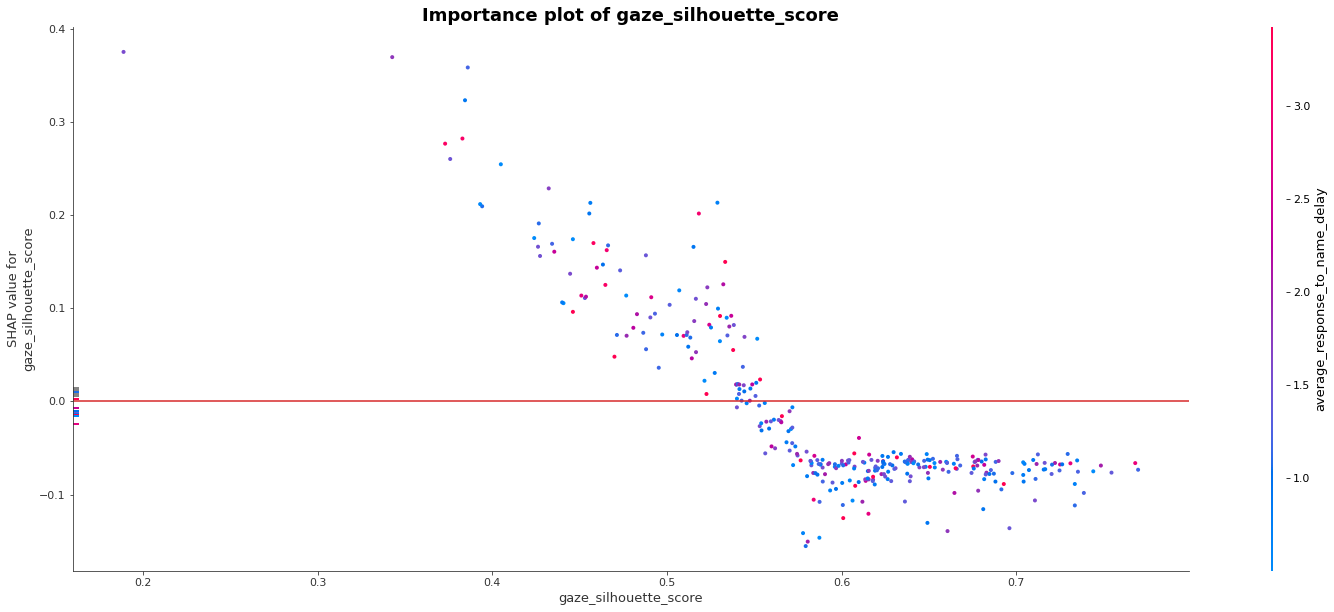

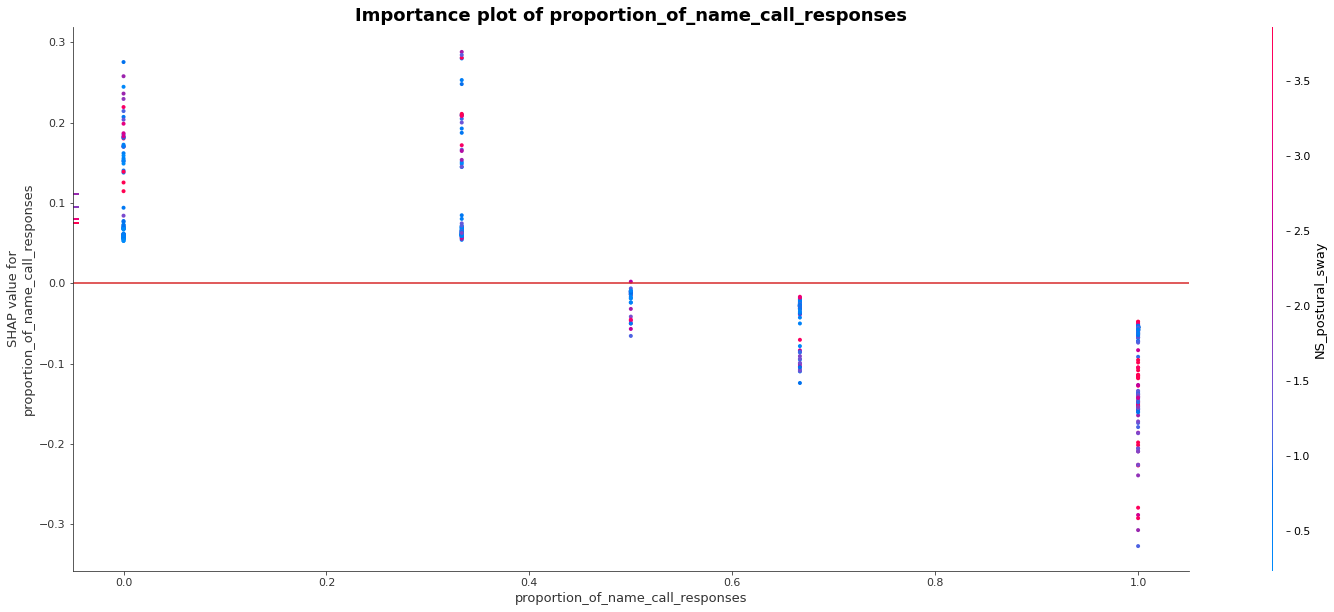

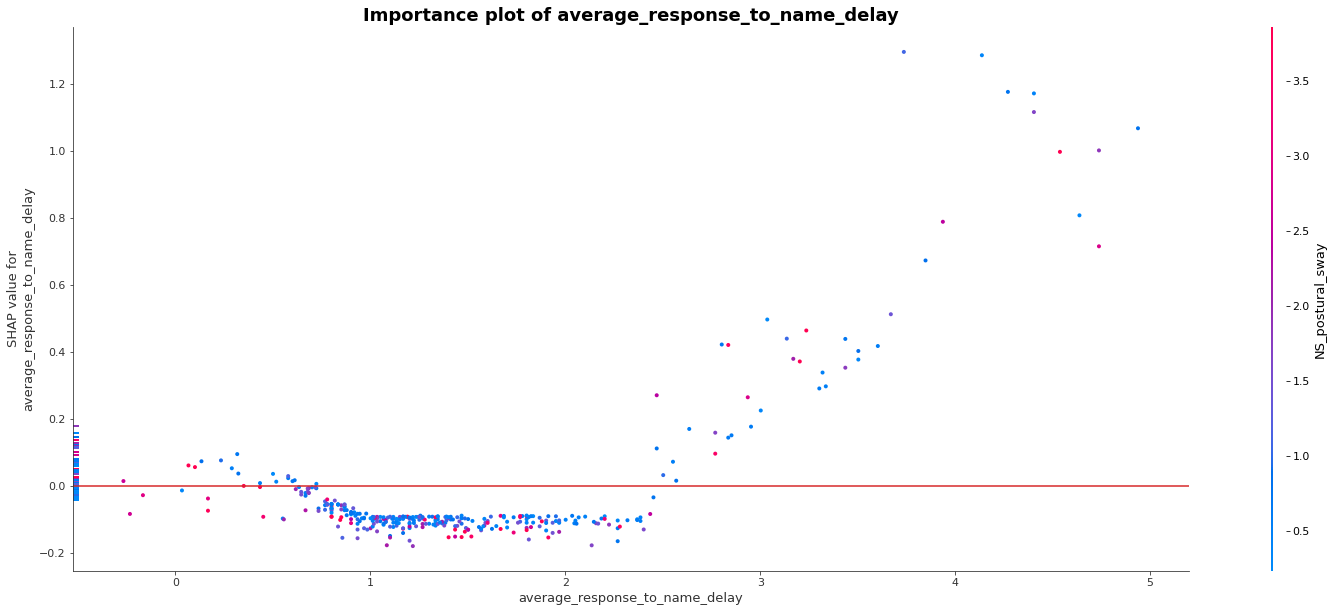

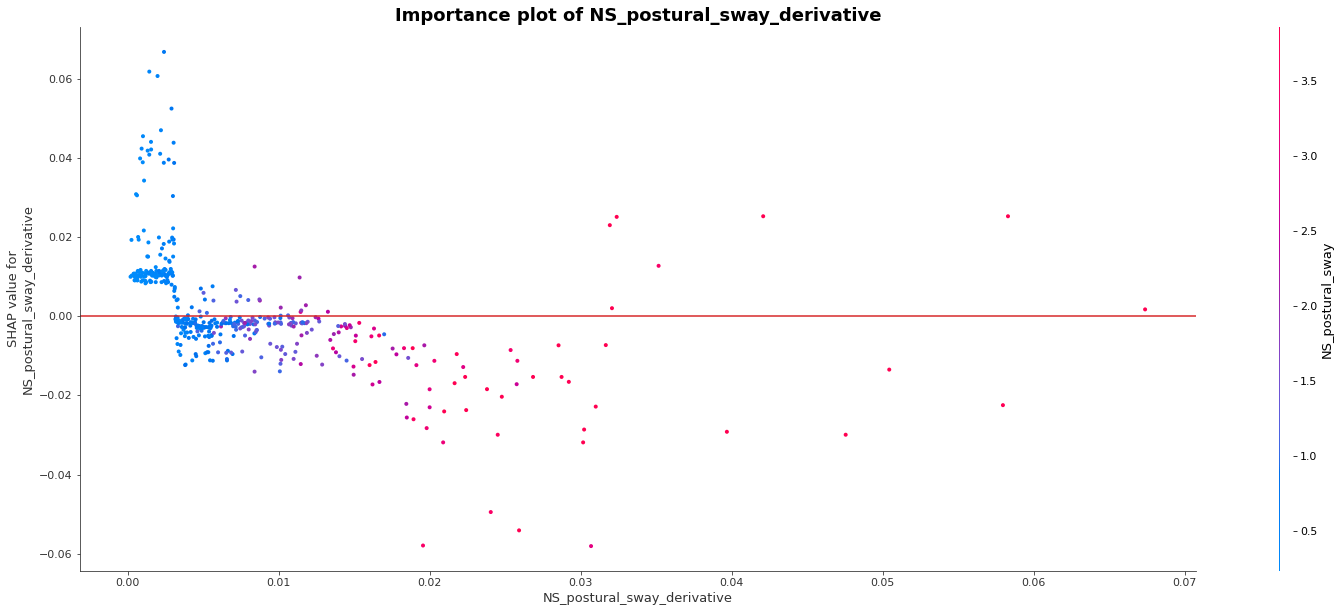

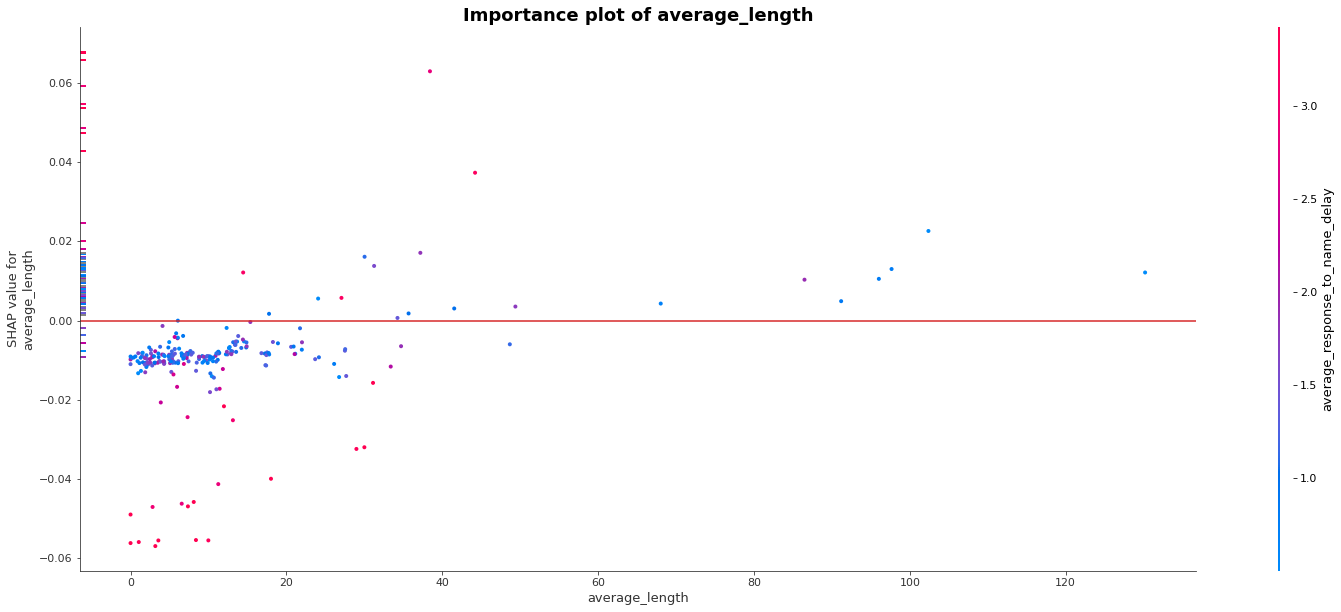

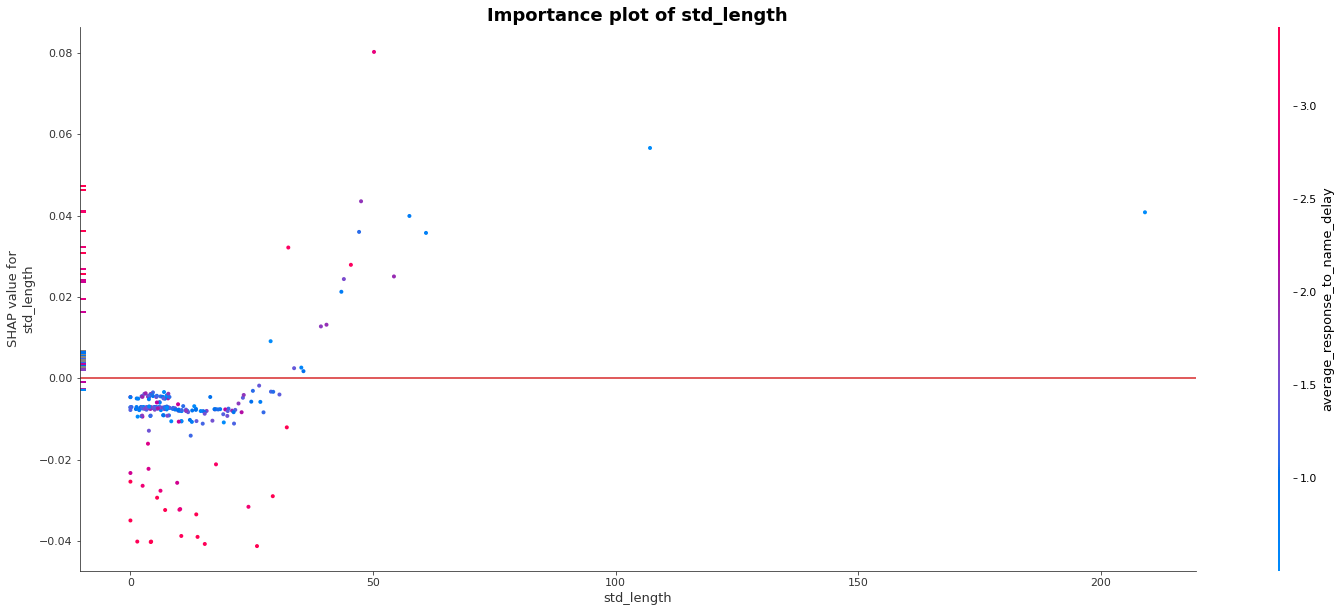

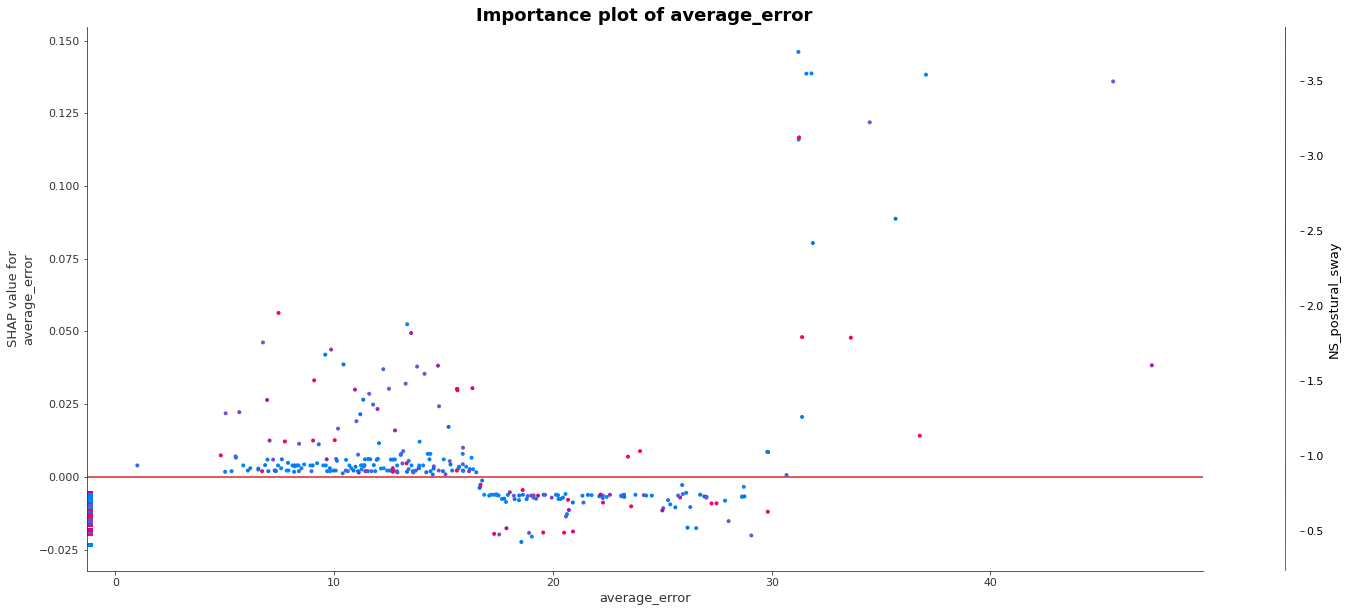

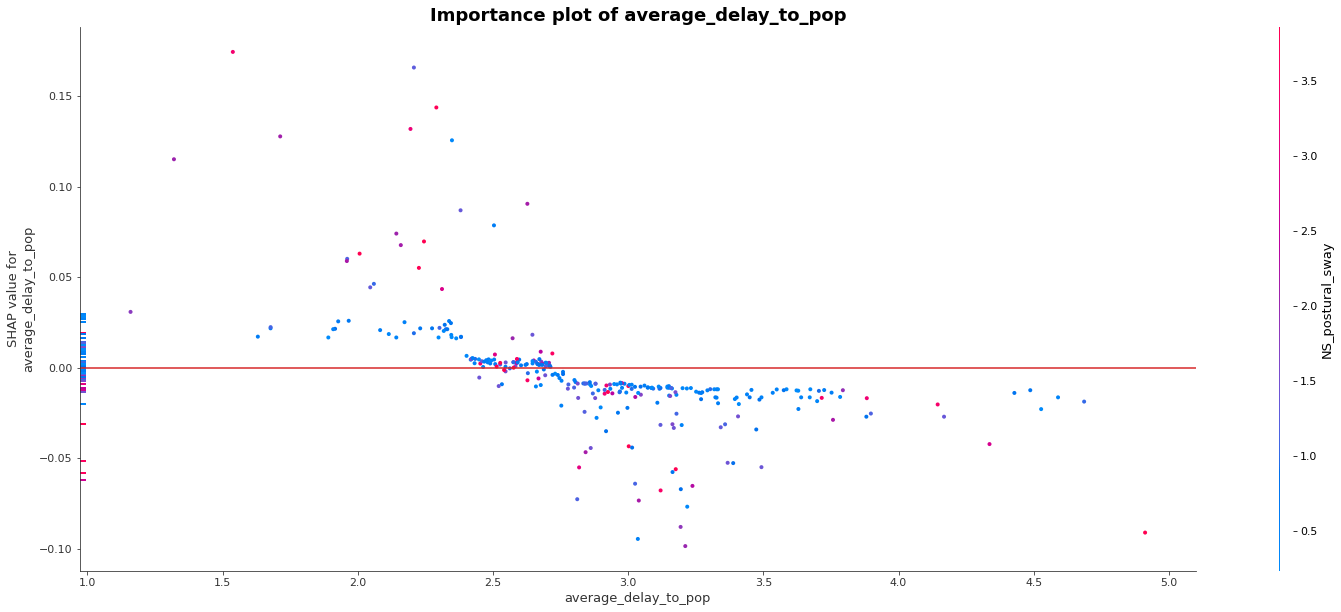

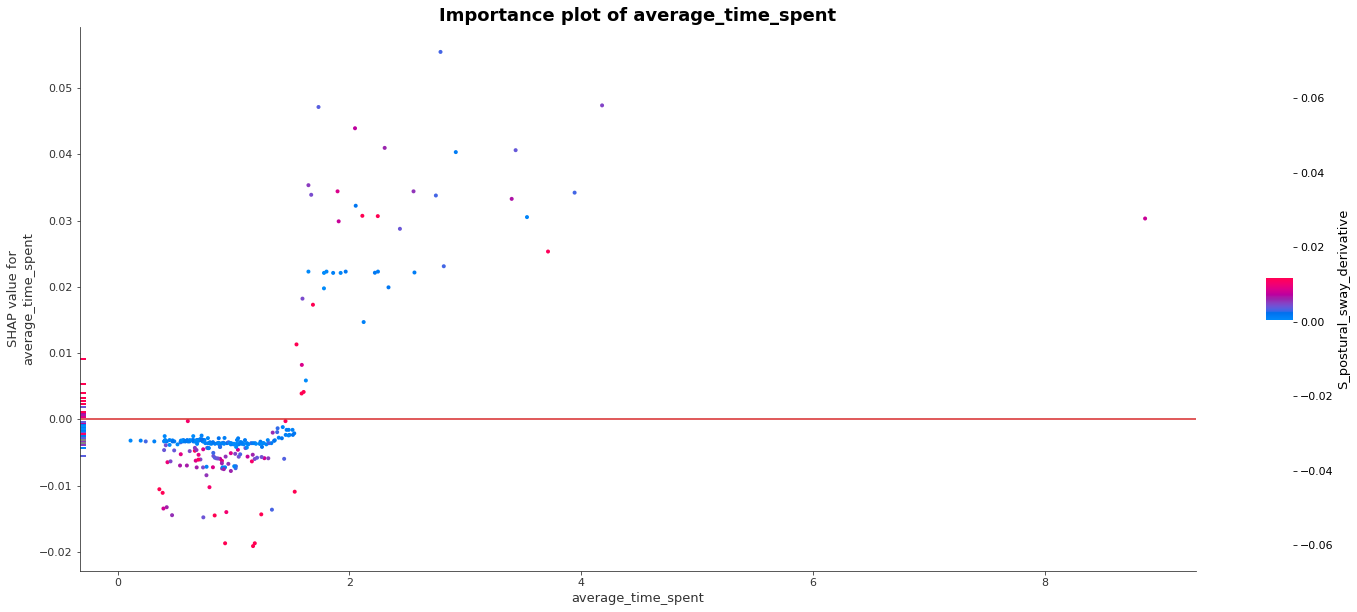

In [152]:


for feat in DEFAULT_PREDICTORS:
    
    if feat in ['NS_postural_sway', 'S_postural_sway', 'S_postural_sway_derivative']:
        continue
    
    try:
        fig = plt.figure(figsize=(25, 10));ax=plt.gca()
        ax.axhline(0, color='tab:red')
        ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
        shap.dependence_plot(feat, shap_values, X, display_features=X_display, ax=ax)
    except:
        pass

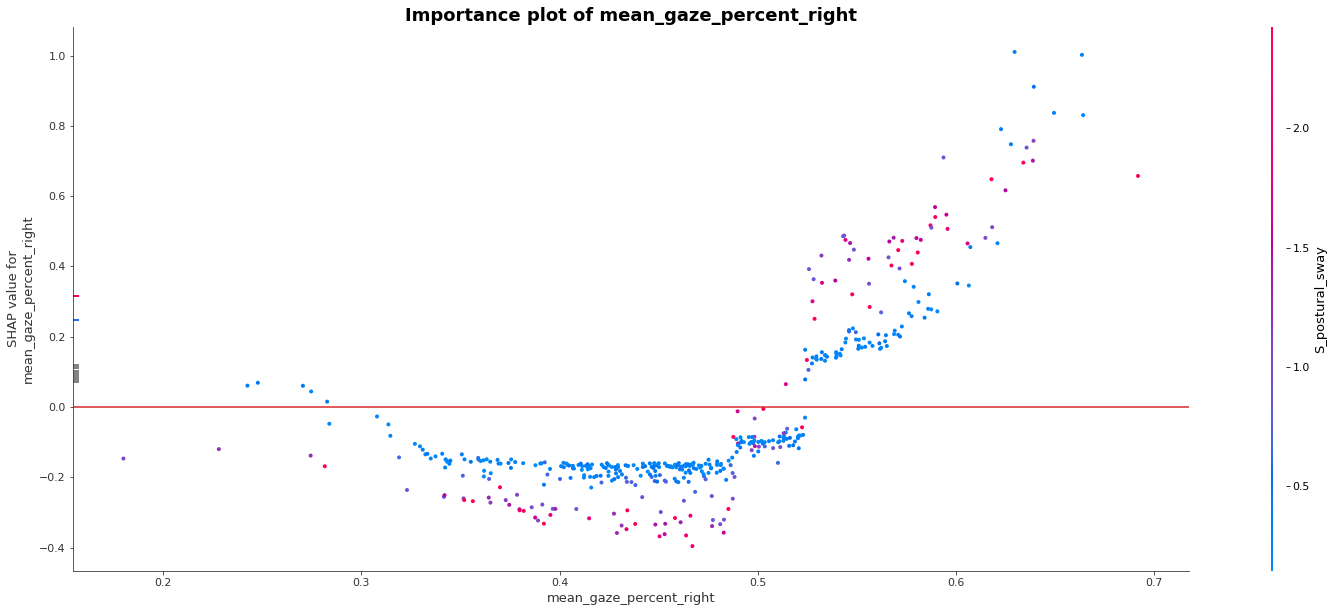

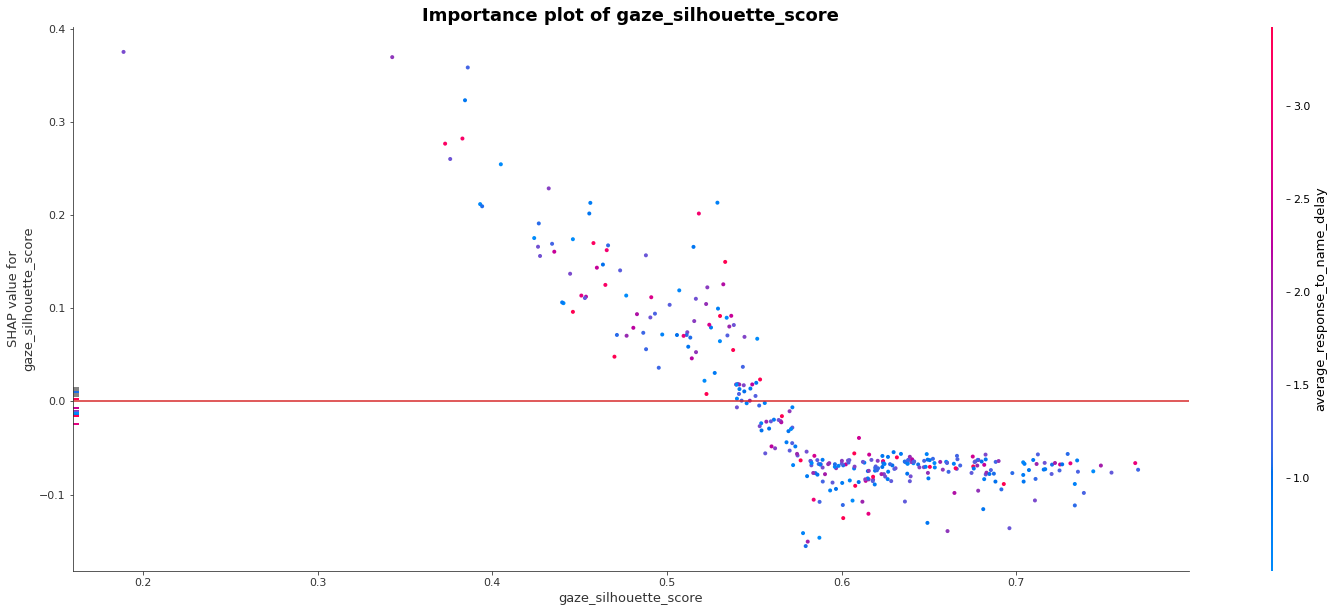

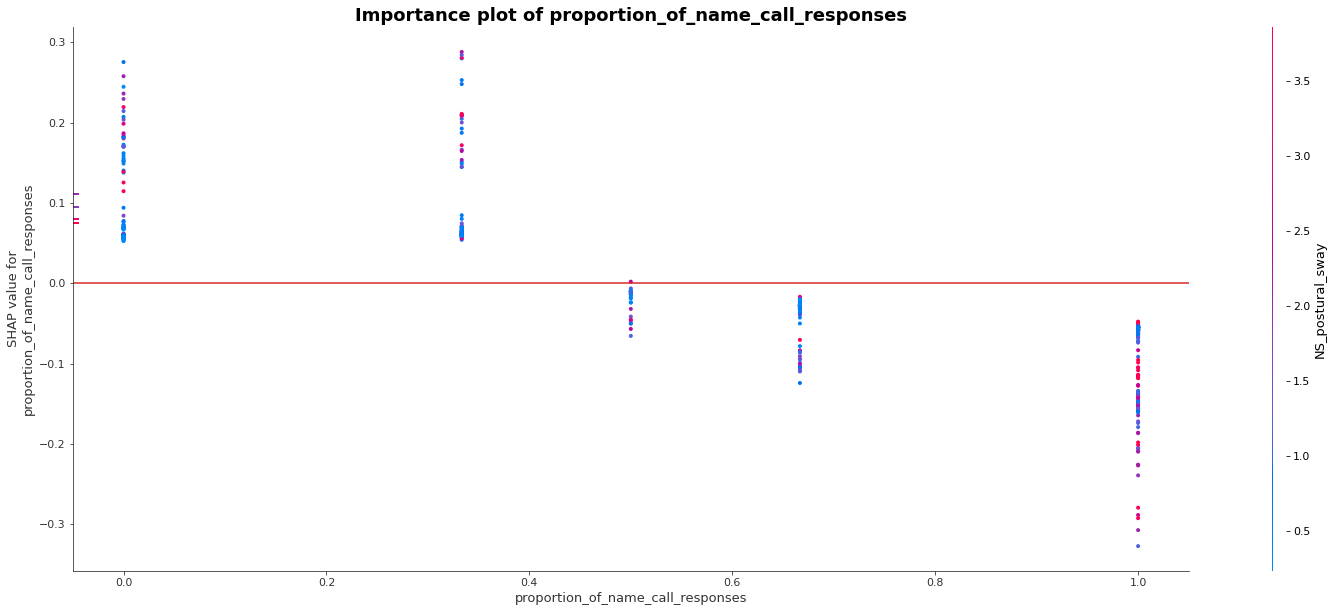

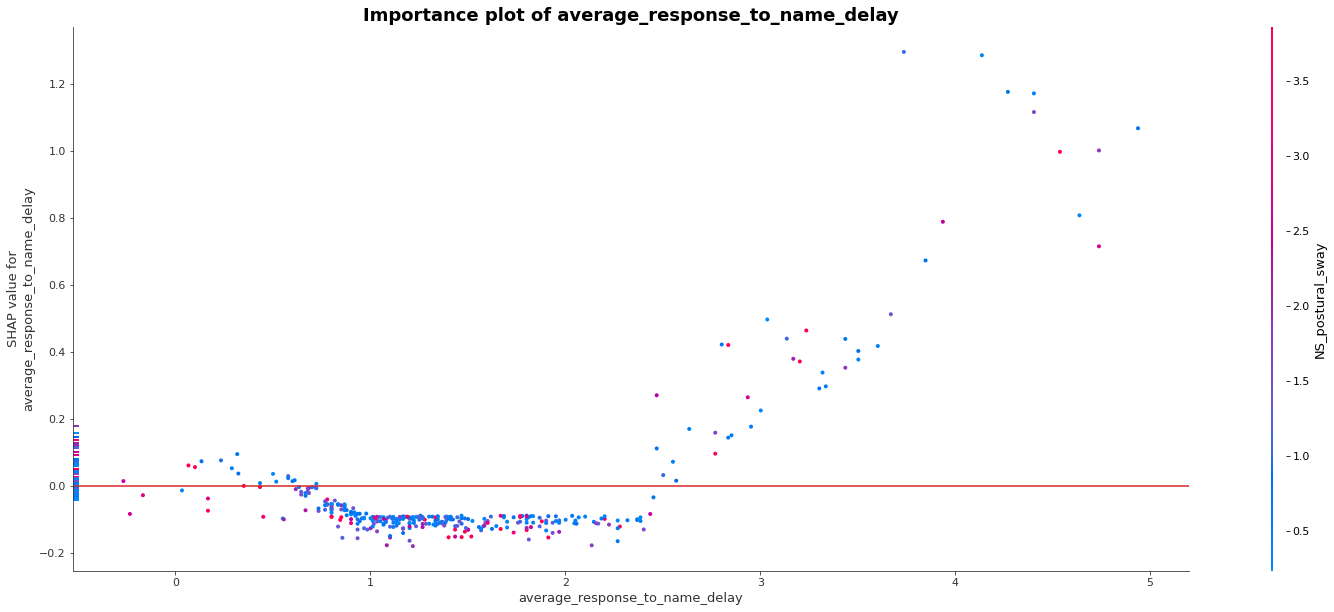

ValueError: Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.

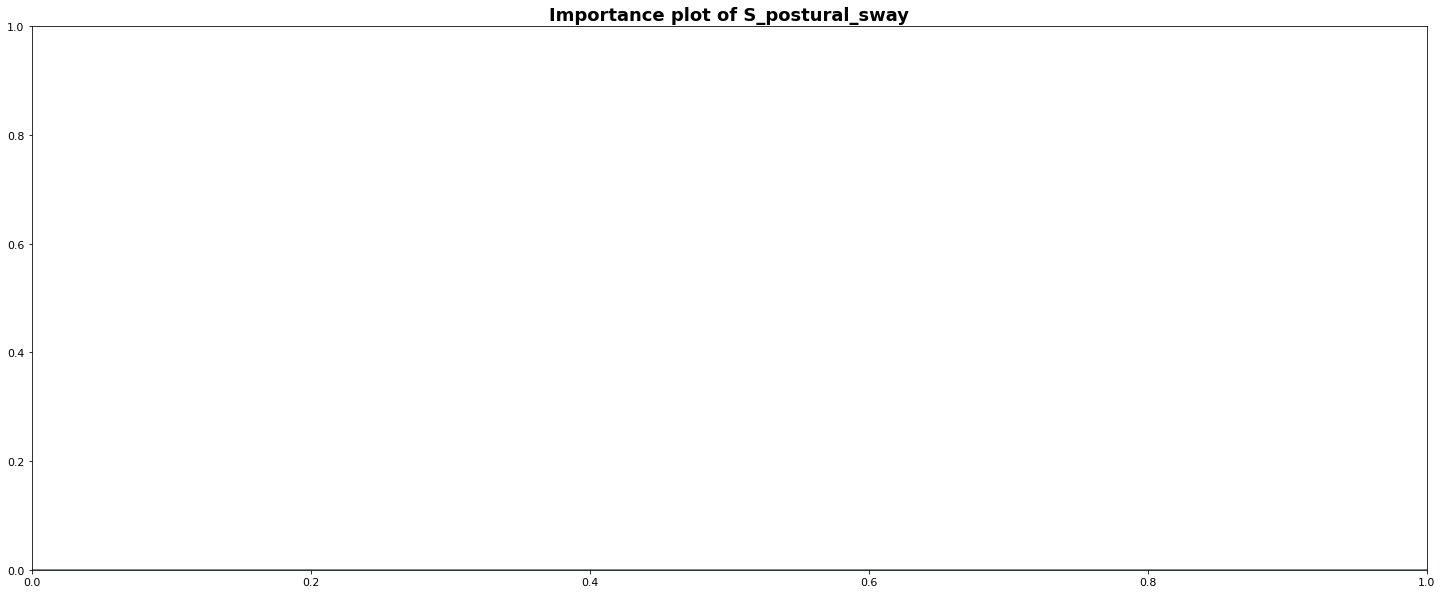

In [153]:


for feat in DEFAULT_PREDICTORS:
    fig = plt.figure(figsize=(25, 10));ax=plt.gca()
    ax.axhline(0, color='tab:red')
    ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
    shap.dependence_plot(feat, shap_values, X, display_features=X_display, ax=ax)


## Compute SHAP Interaction Values


See the Tree SHAP paper for more details, but briefly, SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

In [81]:
shap_interaction_values = shap.TreeExplainer(exp.model).shap_interaction_values(X)


## SHAP Interaction Value Summary Plot¶
A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.



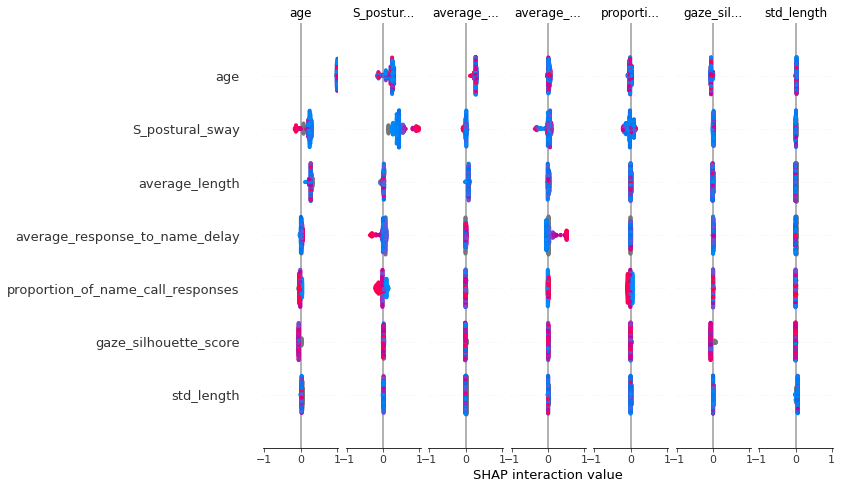

In [84]:
shap.summary_plot(shap_interaction_values, X, plot_size=(30, 15))


## SHAP Interaction Value Dependence Plots
Running a dependence plot on the SHAP interaction values a allows us to separately observe the main effects and the interaction effects.

Below we plot the main effects for age and some of the interaction effects for age. It is informative to compare the main effects plot of age with the earlier SHAP value plot for age. The main effects plot has no vertical dispersion because the interaction effects are all captured in the off-diagonal terms.

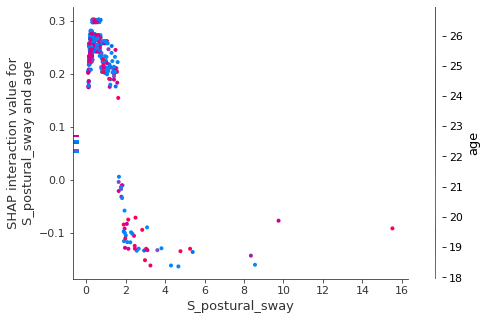

In [97]:
shap.dependence_plot(
    (DEFAULT_PREDICTORS[7], DEFAULT_PREDICTORS[0]),
    shap_interaction_values, X,
    display_features=X_display)

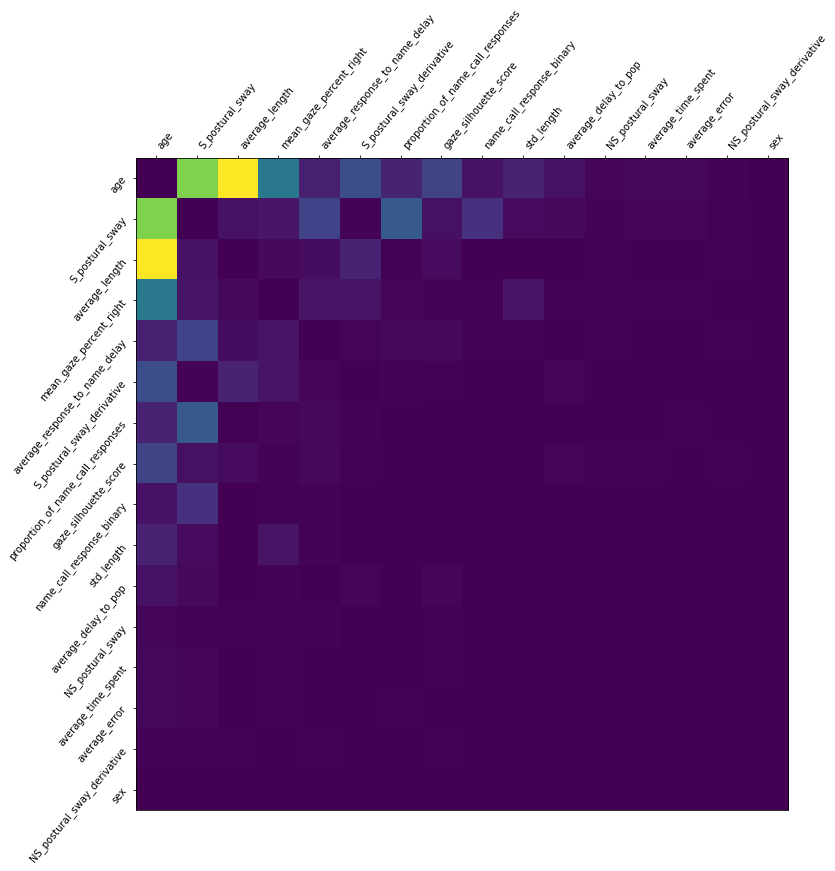

In [91]:
import matplotlib.pylab as pl

tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

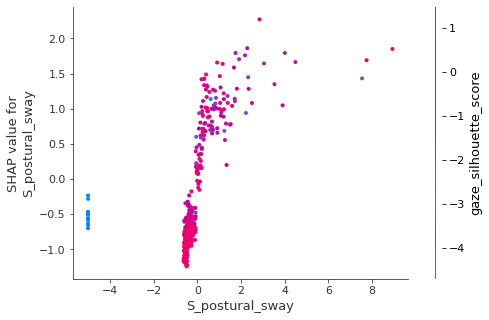

In [42]:
shap.dependence_plot("S_postural_sway", shap_values, exp_ebm.dataset.X_train, feature_names=features)


## Explain the model's predictions on the entire dataset¶


In [105]:
import shap 
explainer = shap.TreeExplainer(exp.model, feature_names=DEFAULT_PREDICTORS)
shap_values = explainer.shap_values(X, approximate=False)

## SHAP Summary Plot¶


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of being autistic for the trained XGBoost model. 

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in risk.

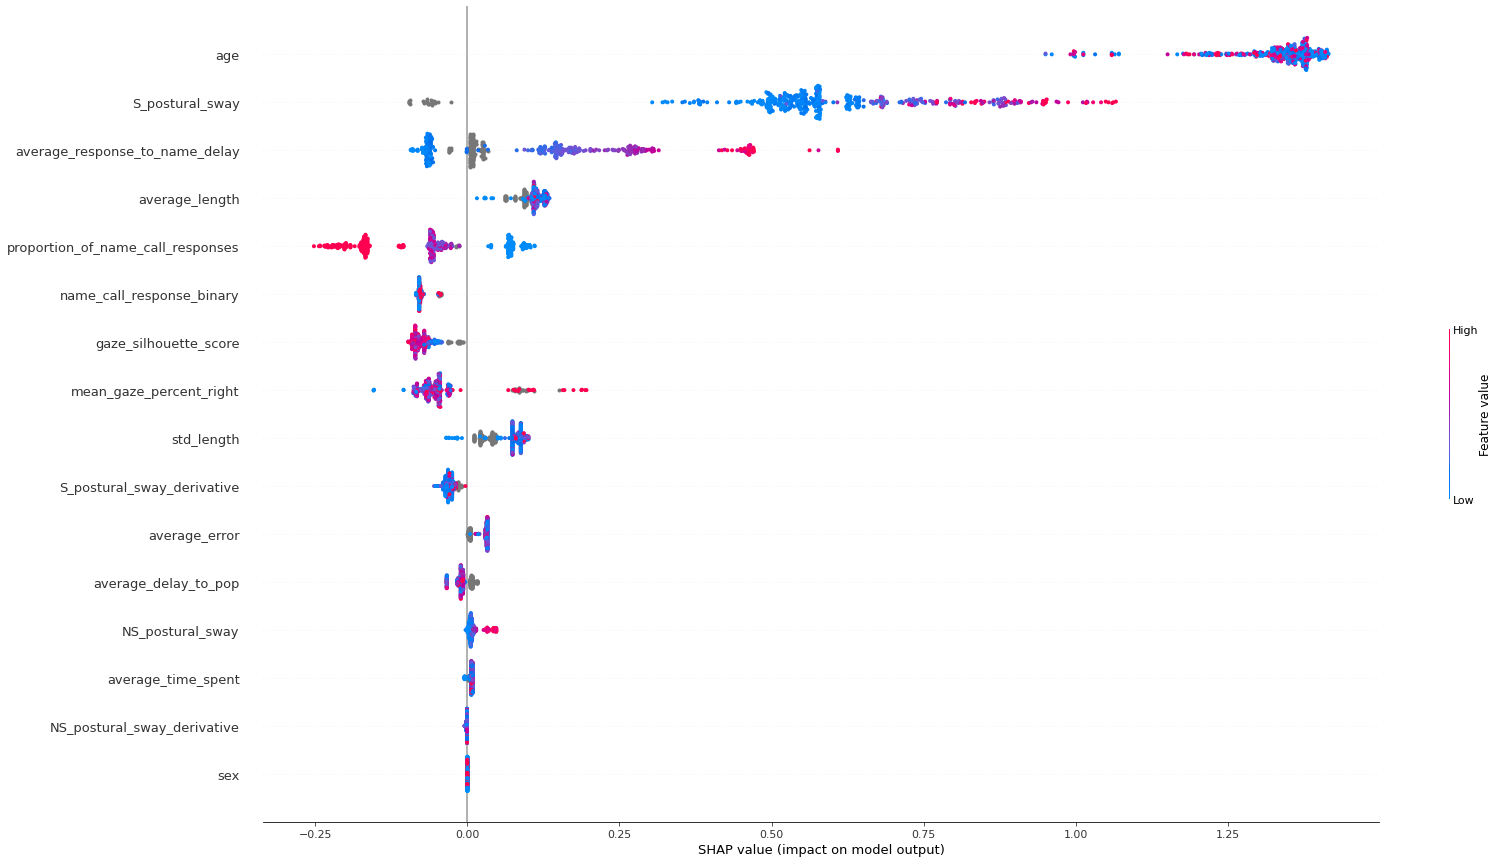

In [121]:
shap.summary_plot(shap_values, X, feature_names=DEFAULT_PREDICTORS, plot_size=(25, 15))

## SHAP Dependence Plots


While a SHAP summary plot gives a general overview of each feature a SHAP dependence plot show how the model output varies by feauture value. Note that every dot is a participant, and the vertical dispersion at a single feature value results from interaction effects in the model. The feature used for coloring is automatically chosen to highlight what might be driving these interactions. Later we will see how to check that the interaction is really in the model with SHAP interaction values. Note that the row of a SHAP summary plot results from projecting the points of a SHAP dependence plot onto the y-axis, then recoloring by the feature itself.


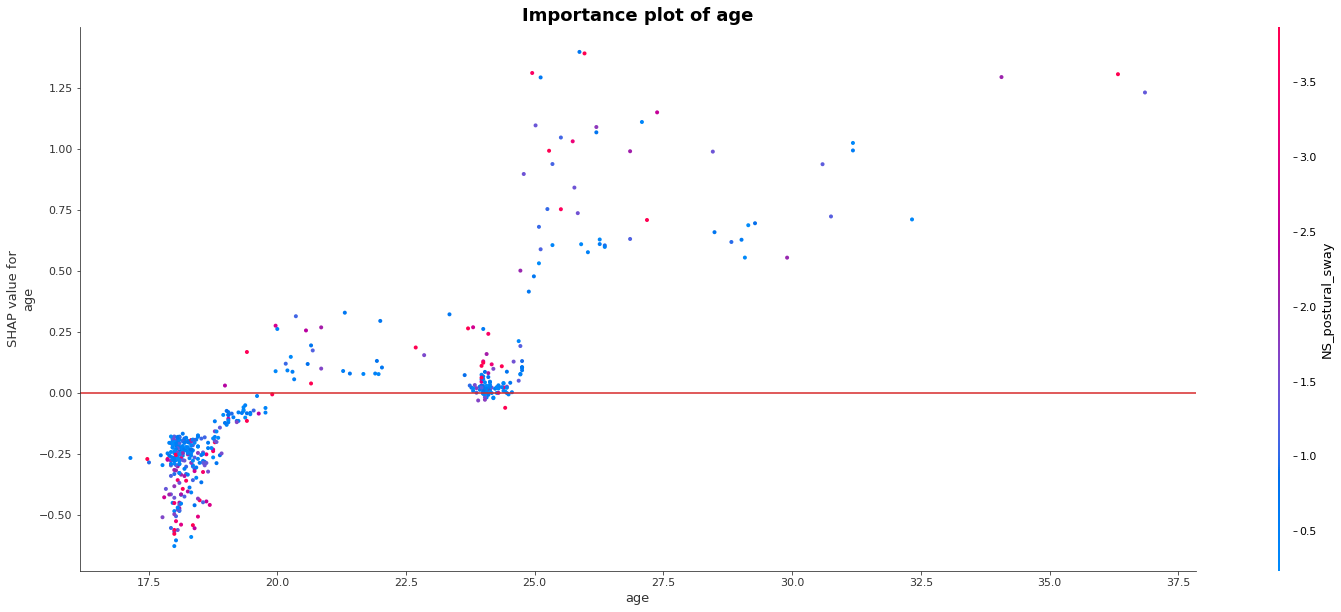

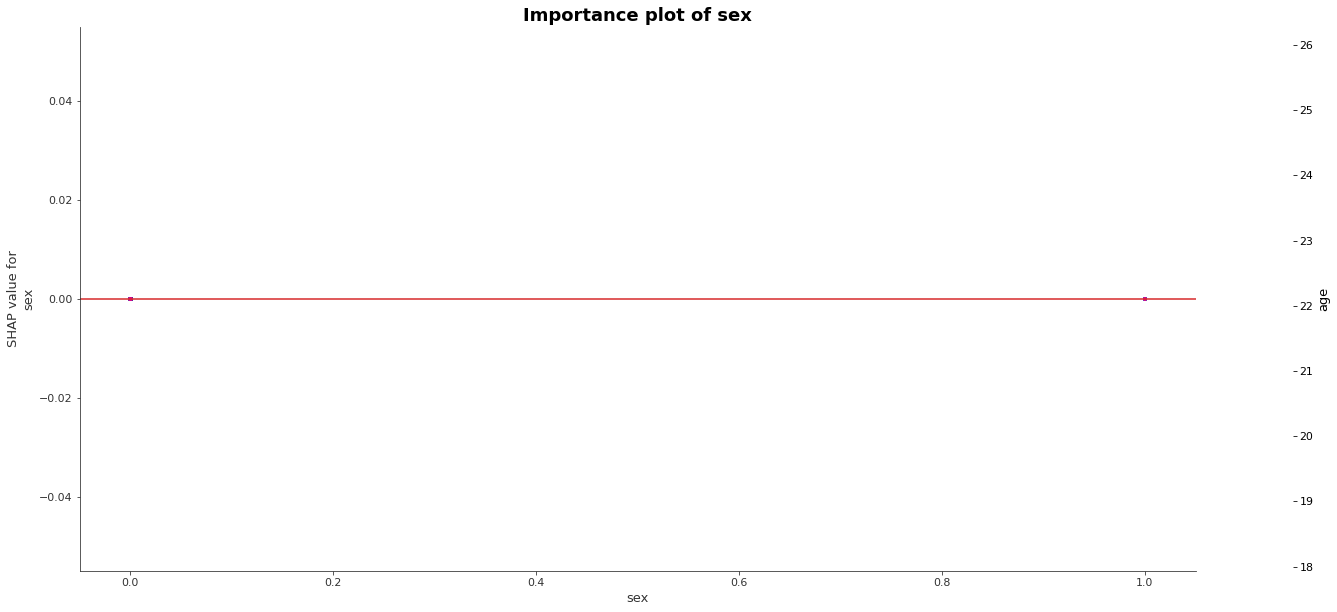

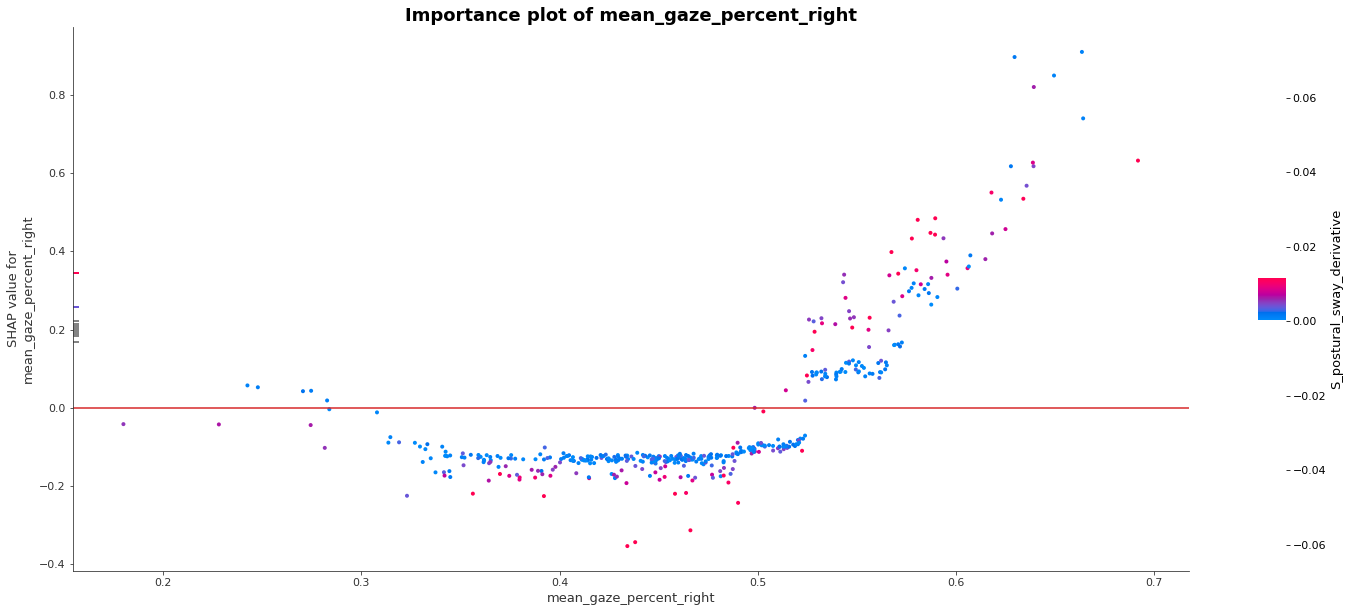

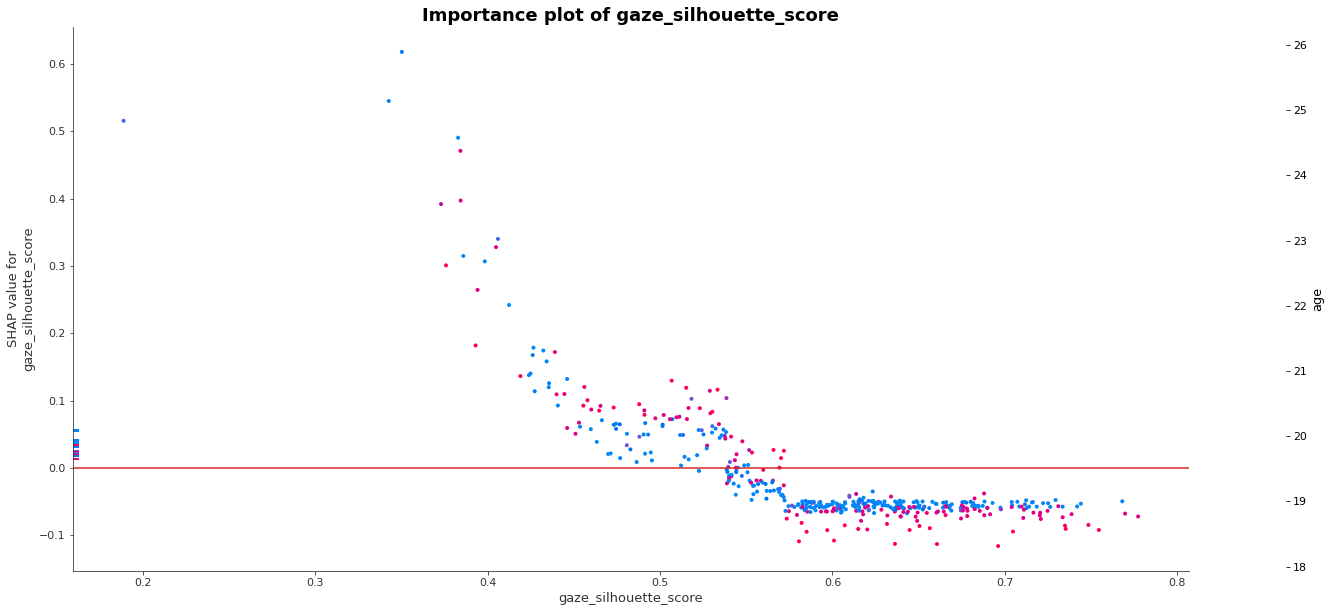

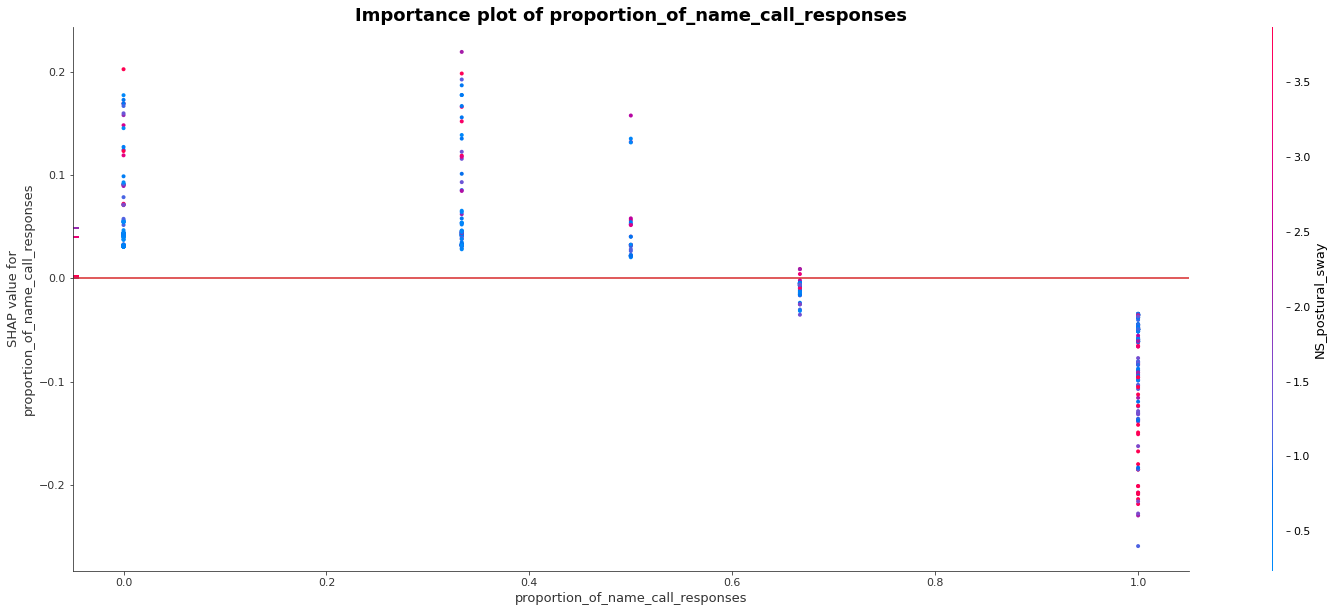

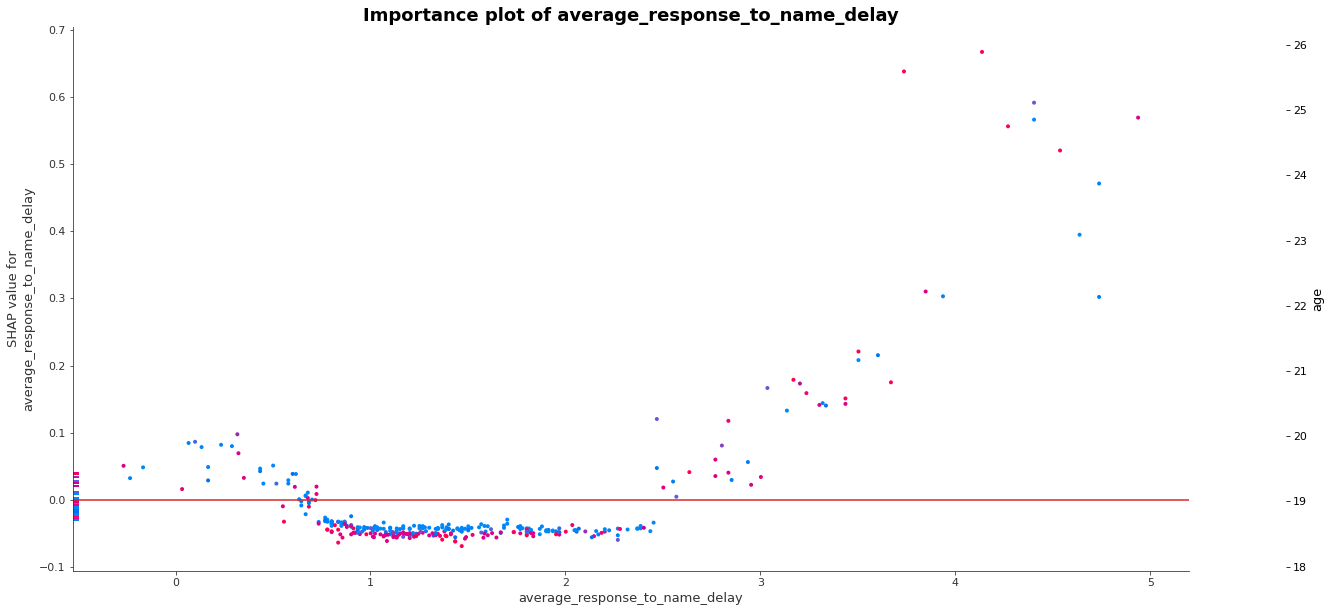

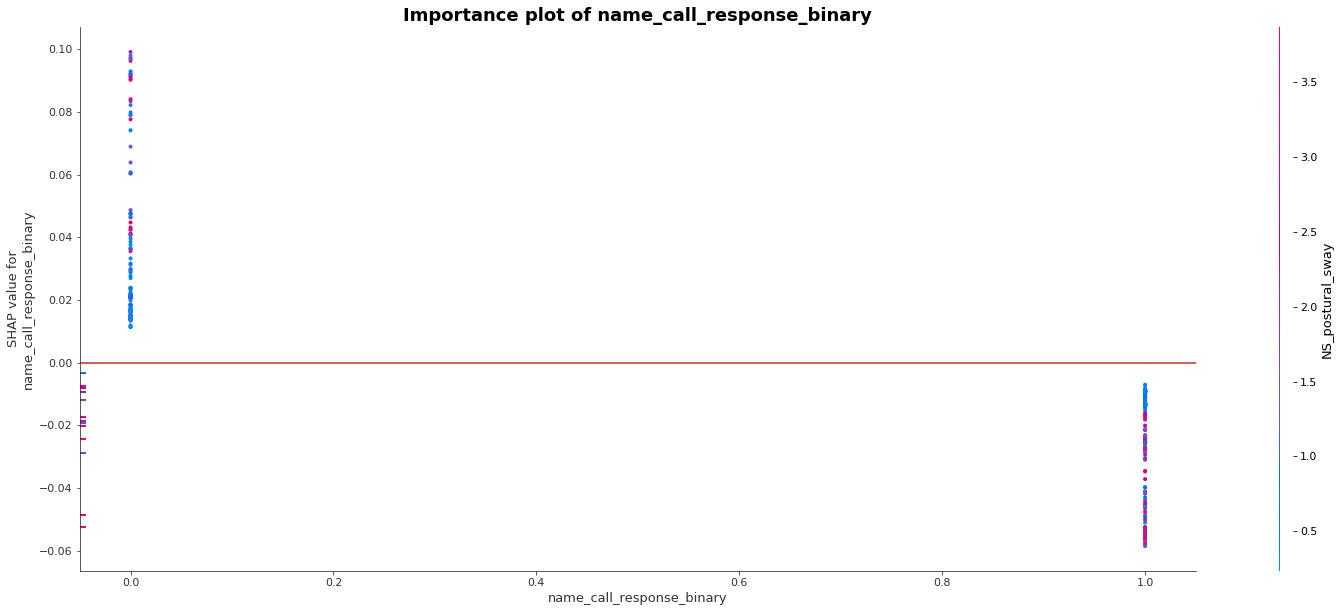

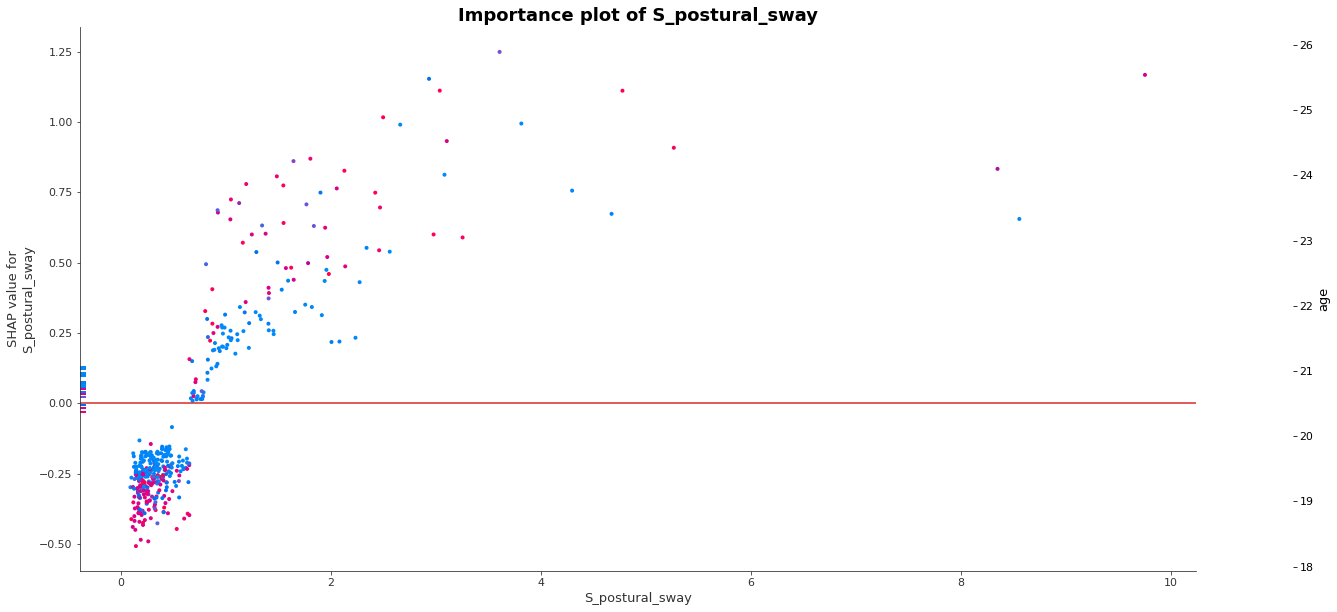

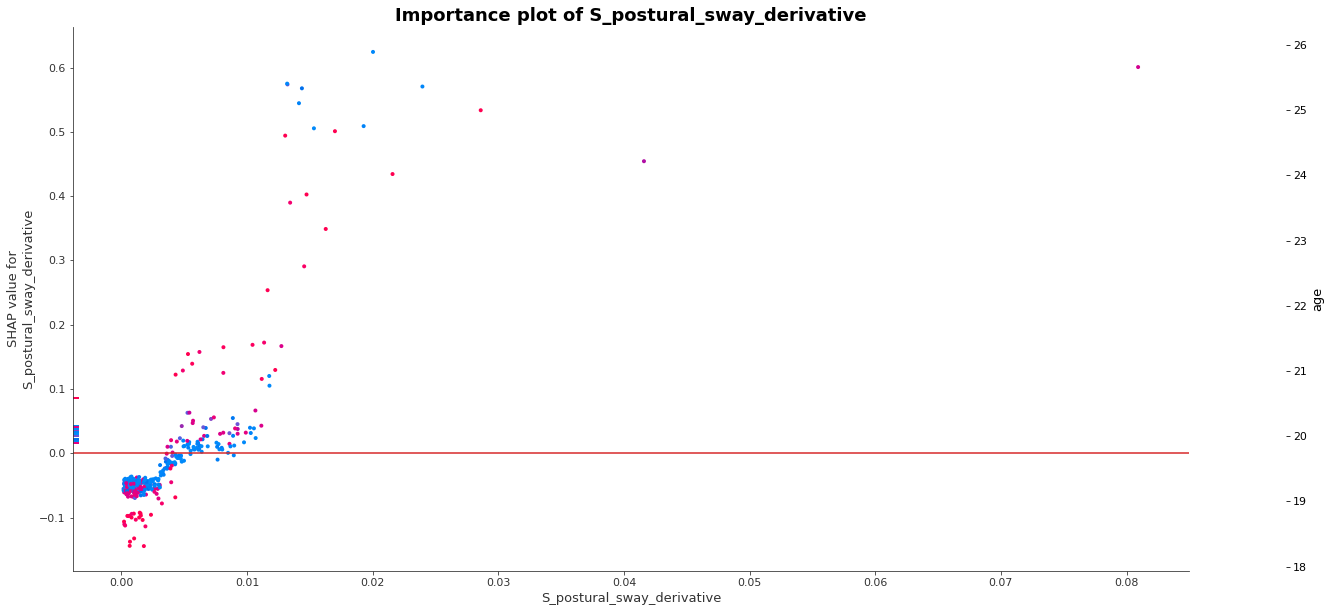

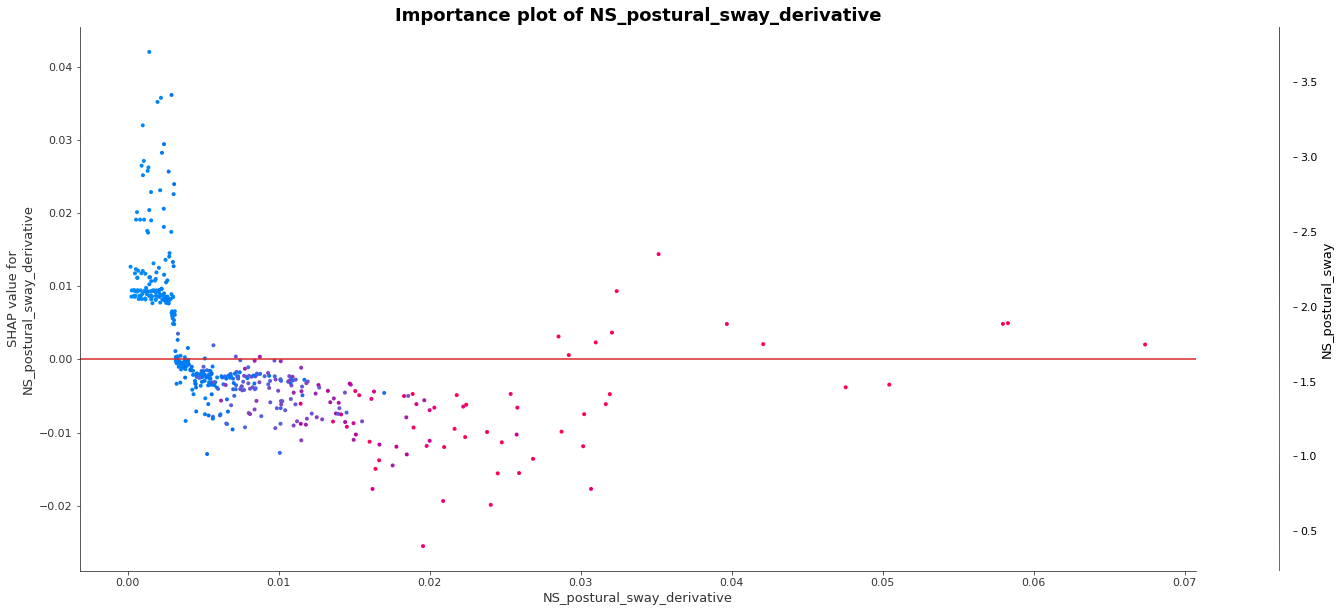

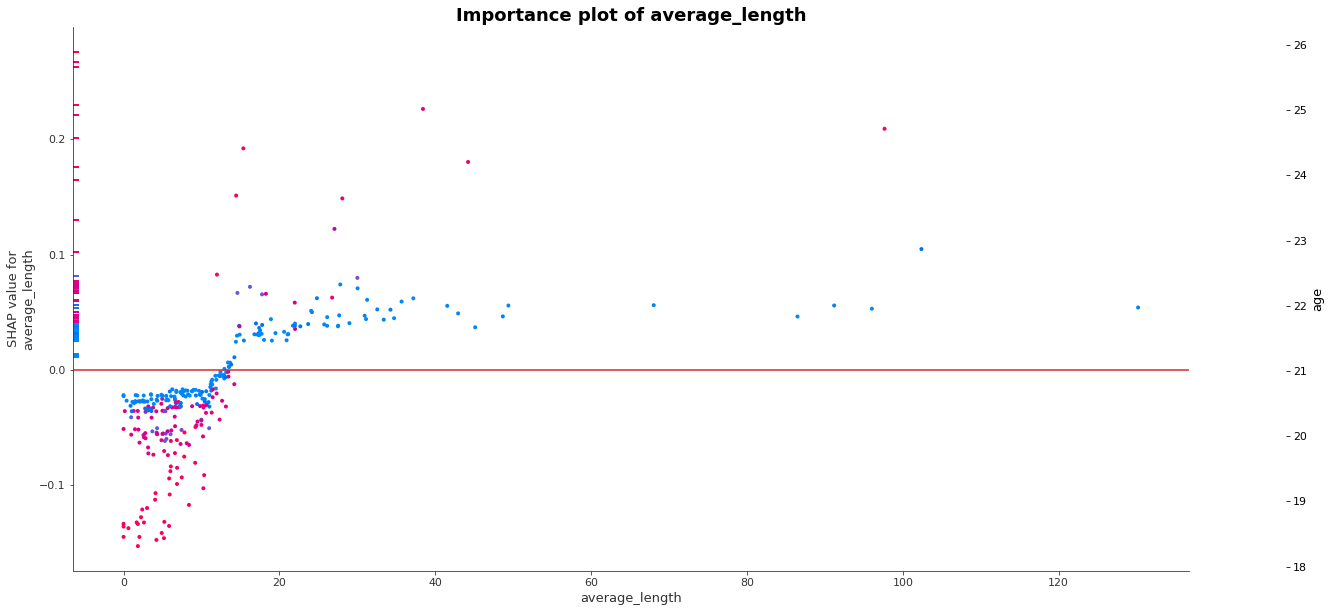

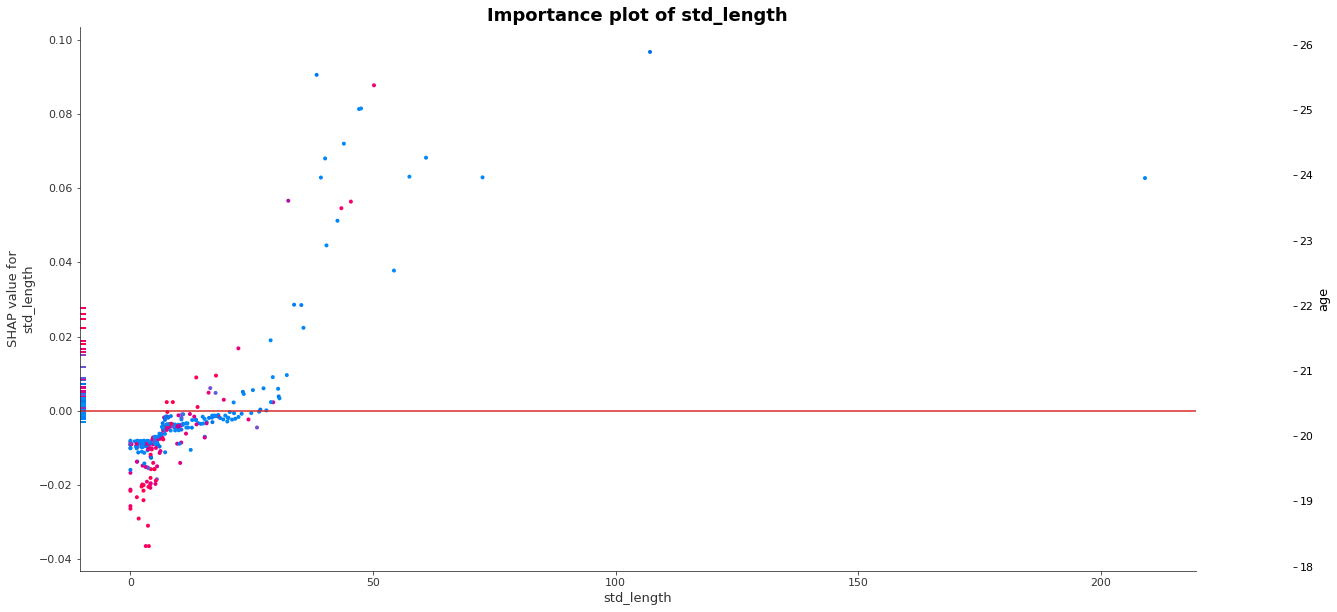

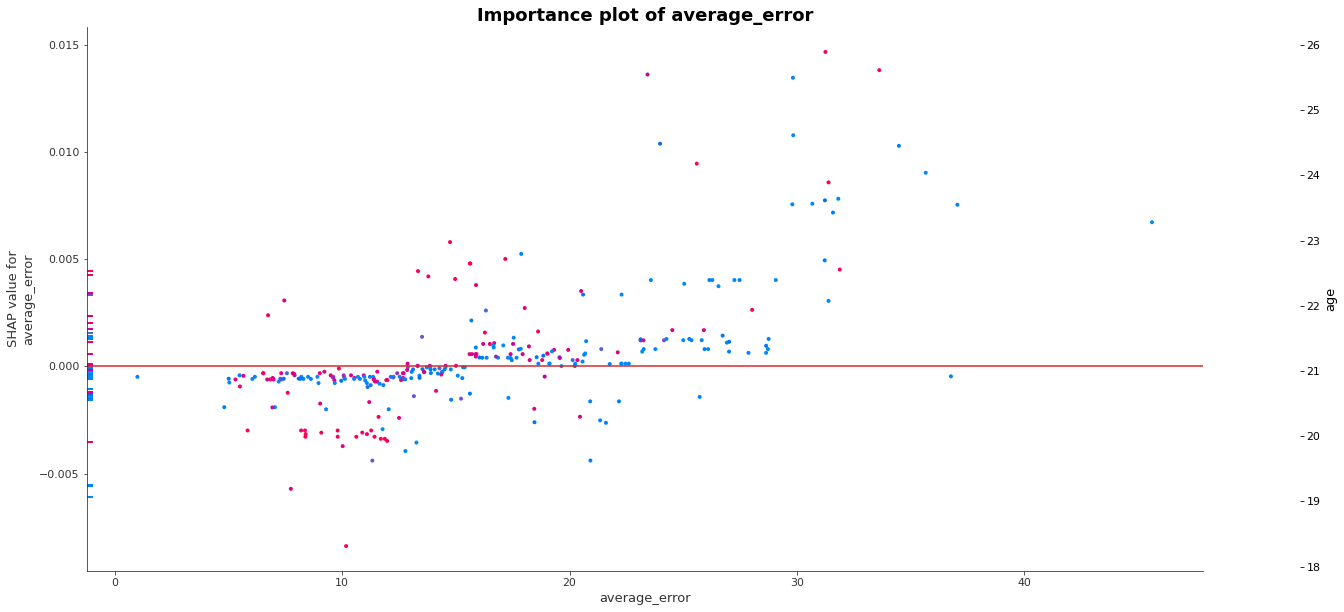

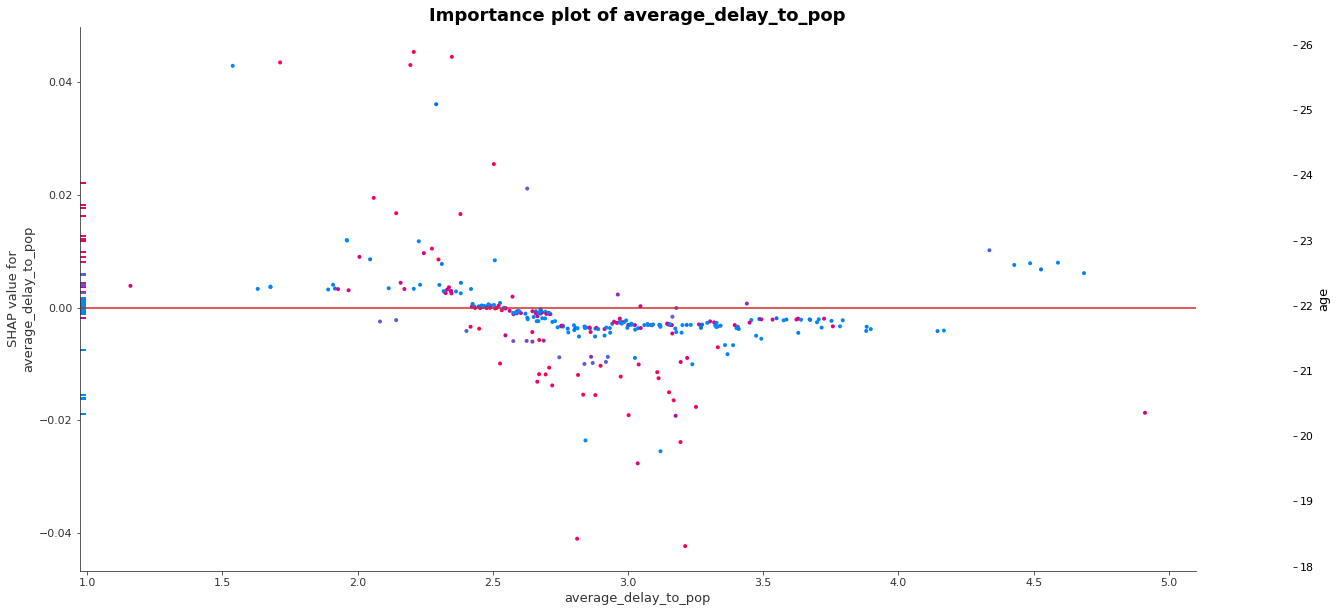

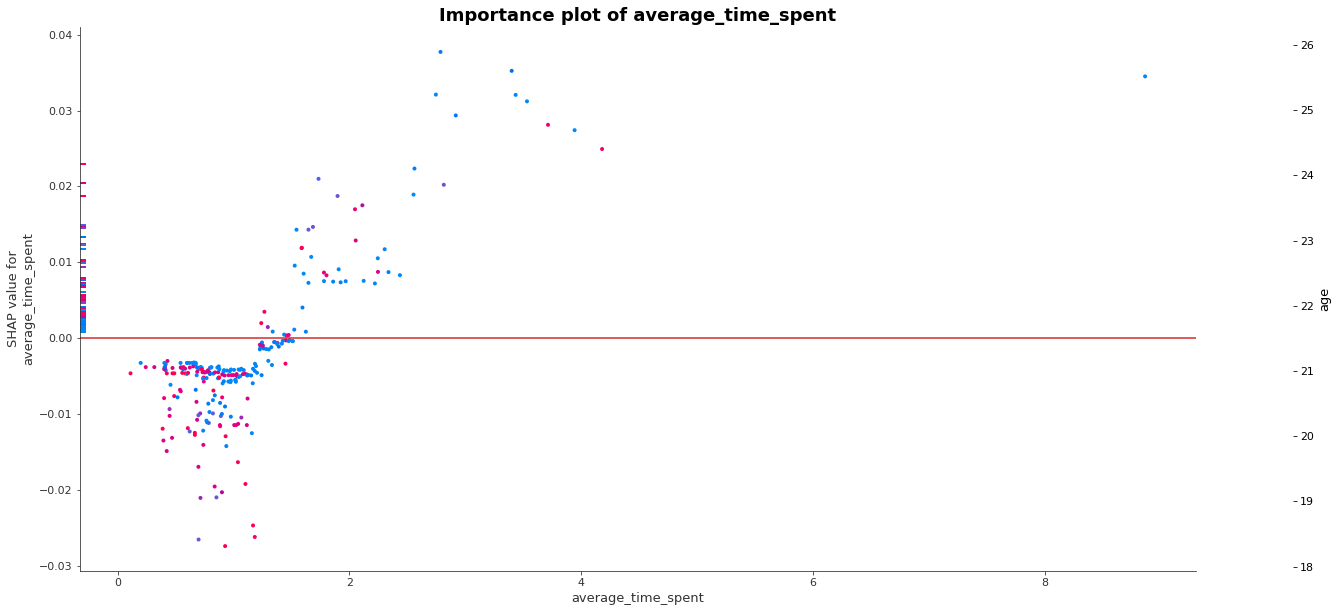

In [72]:


for feat in DEFAULT_PREDICTORS:
    if feat =='NS_postural_sway':
        continue
    
    fig = plt.figure(figsize=(25, 10));ax=plt.gca()
    ax.axhline(0, color='tab:red')
    ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
    shap.dependence_plot(feat, shap_values, X, display_features=X_display, ax=ax)


## Compute SHAP Interaction Values


See the Tree SHAP paper for more details, but briefly, SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

In [81]:
shap_interaction_values = shap.TreeExplainer(exp.model).shap_interaction_values(X)


## SHAP Interaction Value Summary Plot¶
A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.



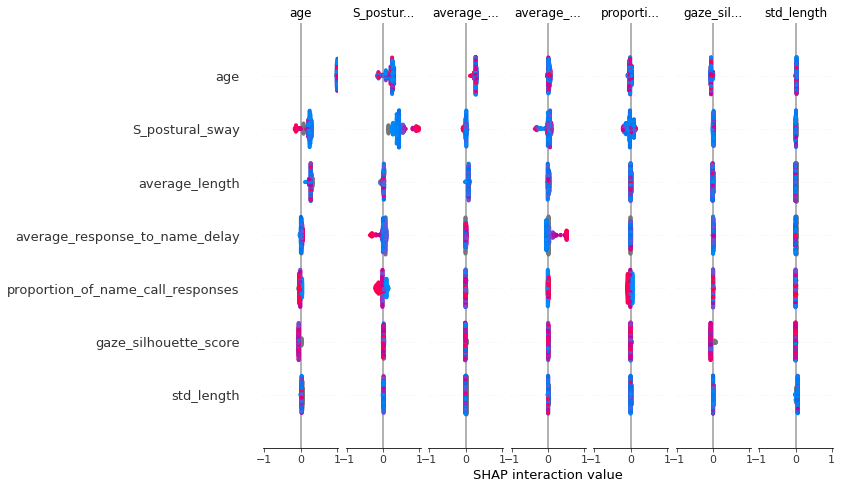

In [84]:
shap.summary_plot(shap_interaction_values, X, plot_size=(30, 15))


## SHAP Interaction Value Dependence Plots
Running a dependence plot on the SHAP interaction values a allows us to separately observe the main effects and the interaction effects.

Below we plot the main effects for age and some of the interaction effects for age. It is informative to compare the main effects plot of age with the earlier SHAP value plot for age. The main effects plot has no vertical dispersion because the interaction effects are all captured in the off-diagonal terms.

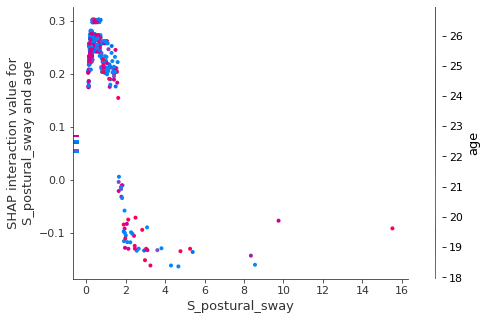

In [97]:
shap.dependence_plot(
    (DEFAULT_PREDICTORS[7], DEFAULT_PREDICTORS[0]),
    shap_interaction_values, X,
    display_features=X_display)

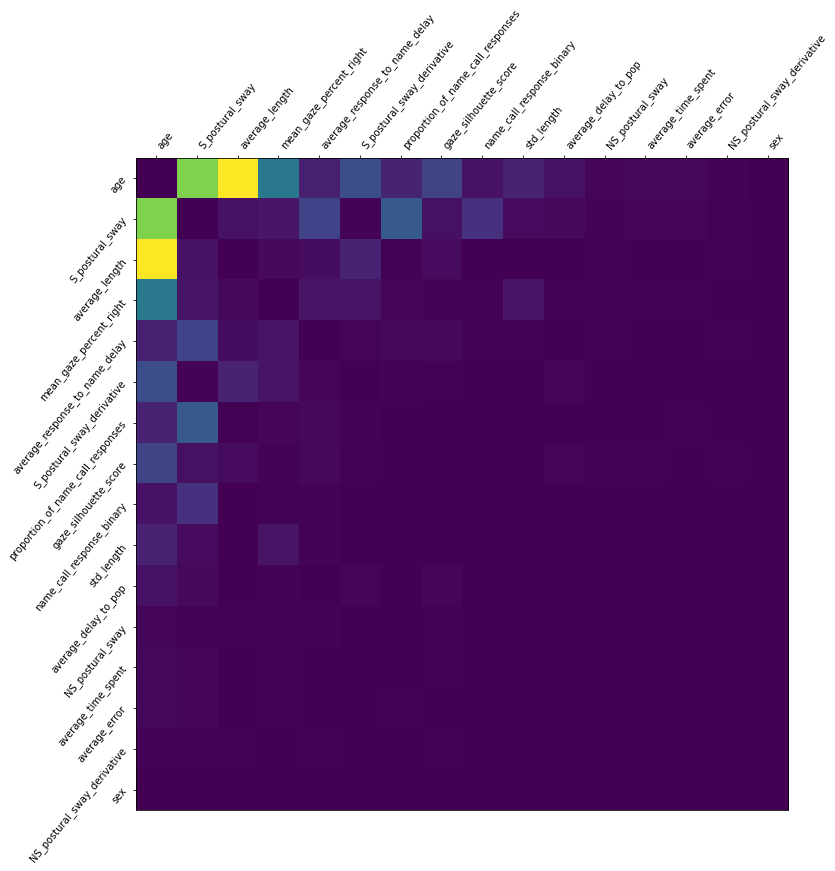

In [91]:
import matplotlib.pylab as pl

tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

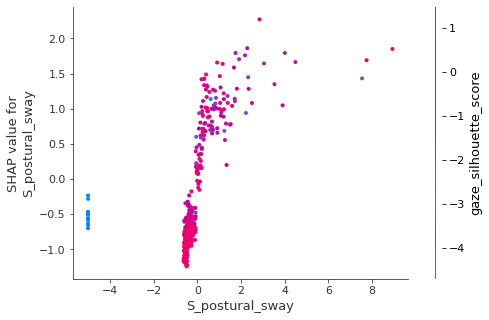

In [42]:
shap.dependence_plot("S_postural_sway", shap_values, exp_ebm.dataset.X_train, feature_names=features)
